### Loading the Dataset

This section of the code imports the pandas library and loads the dataset from a CSV file named `dataset.csv`.

In [72]:
import pandas as pd

file_path = 'dataset.csv'
df = pd.read_csv(file_path)

C:\Users\biement fanteye\AppData\Local\Temp\ipykernel_23020\184961232.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


### Data Summarization and Descriptive Statistics

This code:
- Reviews the data structure by displaying the data types of each column.
- Calculates descriptive statistics (e.g., mean, standard deviation, min, max) for numerical columns.
- Computes the variability (standard deviation) for specific numerical features such as `TotalPremium` and `TotalClaims`.

In [73]:
print("Data Types:")
print(df.dtypes)

Data Types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors   

In [74]:
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())


Descriptive Statistics for Numerical Columns:
       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  1.000098e+06   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.484741e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.366099e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  0.000000e+00   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear     Cylinders  cubiccapacity     kilowatts  \
count      1.000098e+06  1.000098e+06   1.000098e+06  1.000098e+06   
mean       2.010225e+03  4.044409e+00   2.465382e+03  9.715427e+01   
std        3.261391e+00  3.089230e-01   4.464536e+02  1.952187e+01   
min        1.987000e+03 

In [75]:

numerical_cols = ['TotalPremium', 'TotalClaims']
variability = df[numerical_cols].std()
print("\nVariability (Standard Deviation) for Numerical Features:")
print(variability)


Variability (Standard Deviation) for Numerical Features:
TotalPremium     230.284513
TotalClaims     2384.074695
dtype: float64


### Data Quality Assessment: Check for Missing Values

In this section, we will check for missing values in the dataset.

In [76]:
# Check for missing values
missing_values = df.isnull().sum()

In [77]:
# Print the result
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
CustomValueEstimate         0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOu

In [78]:
# Optional: Display columns with missing values only
missing_columns = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(missing_columns)


Columns with missing values:
Series([], dtype: int64)


In [79]:
# Get the numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Get the categorical columns
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Display the results
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
Categorical columns: ['TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']


### Data Visualization

This section provides visualizations for both numerical and categorical columns in the dataset.

### Histograms for Numerical Columns
Histograms are plotted for each numerical column, allowing us to observe the distribution of values across different ranges.

### Bar Charts for Categorical Columns
Categorical data is visualized using bar charts. The first set of charts displays counts for all categorical columns, while subsequent charts focus on specific categories, providing insights into their distributions.

### Detailed Views of Selected Categorical Columns
Individual figures are created for selected categorical columns—`make`, `SubCrestaZone`, and `CoverCategory`—to highlight their distribution. Additionally, horizontal bar charts are used for the `Model`, `VehicleIntroDate`, and `CapitalOutstanding` columns, displaying the top 30 categories for better readability.

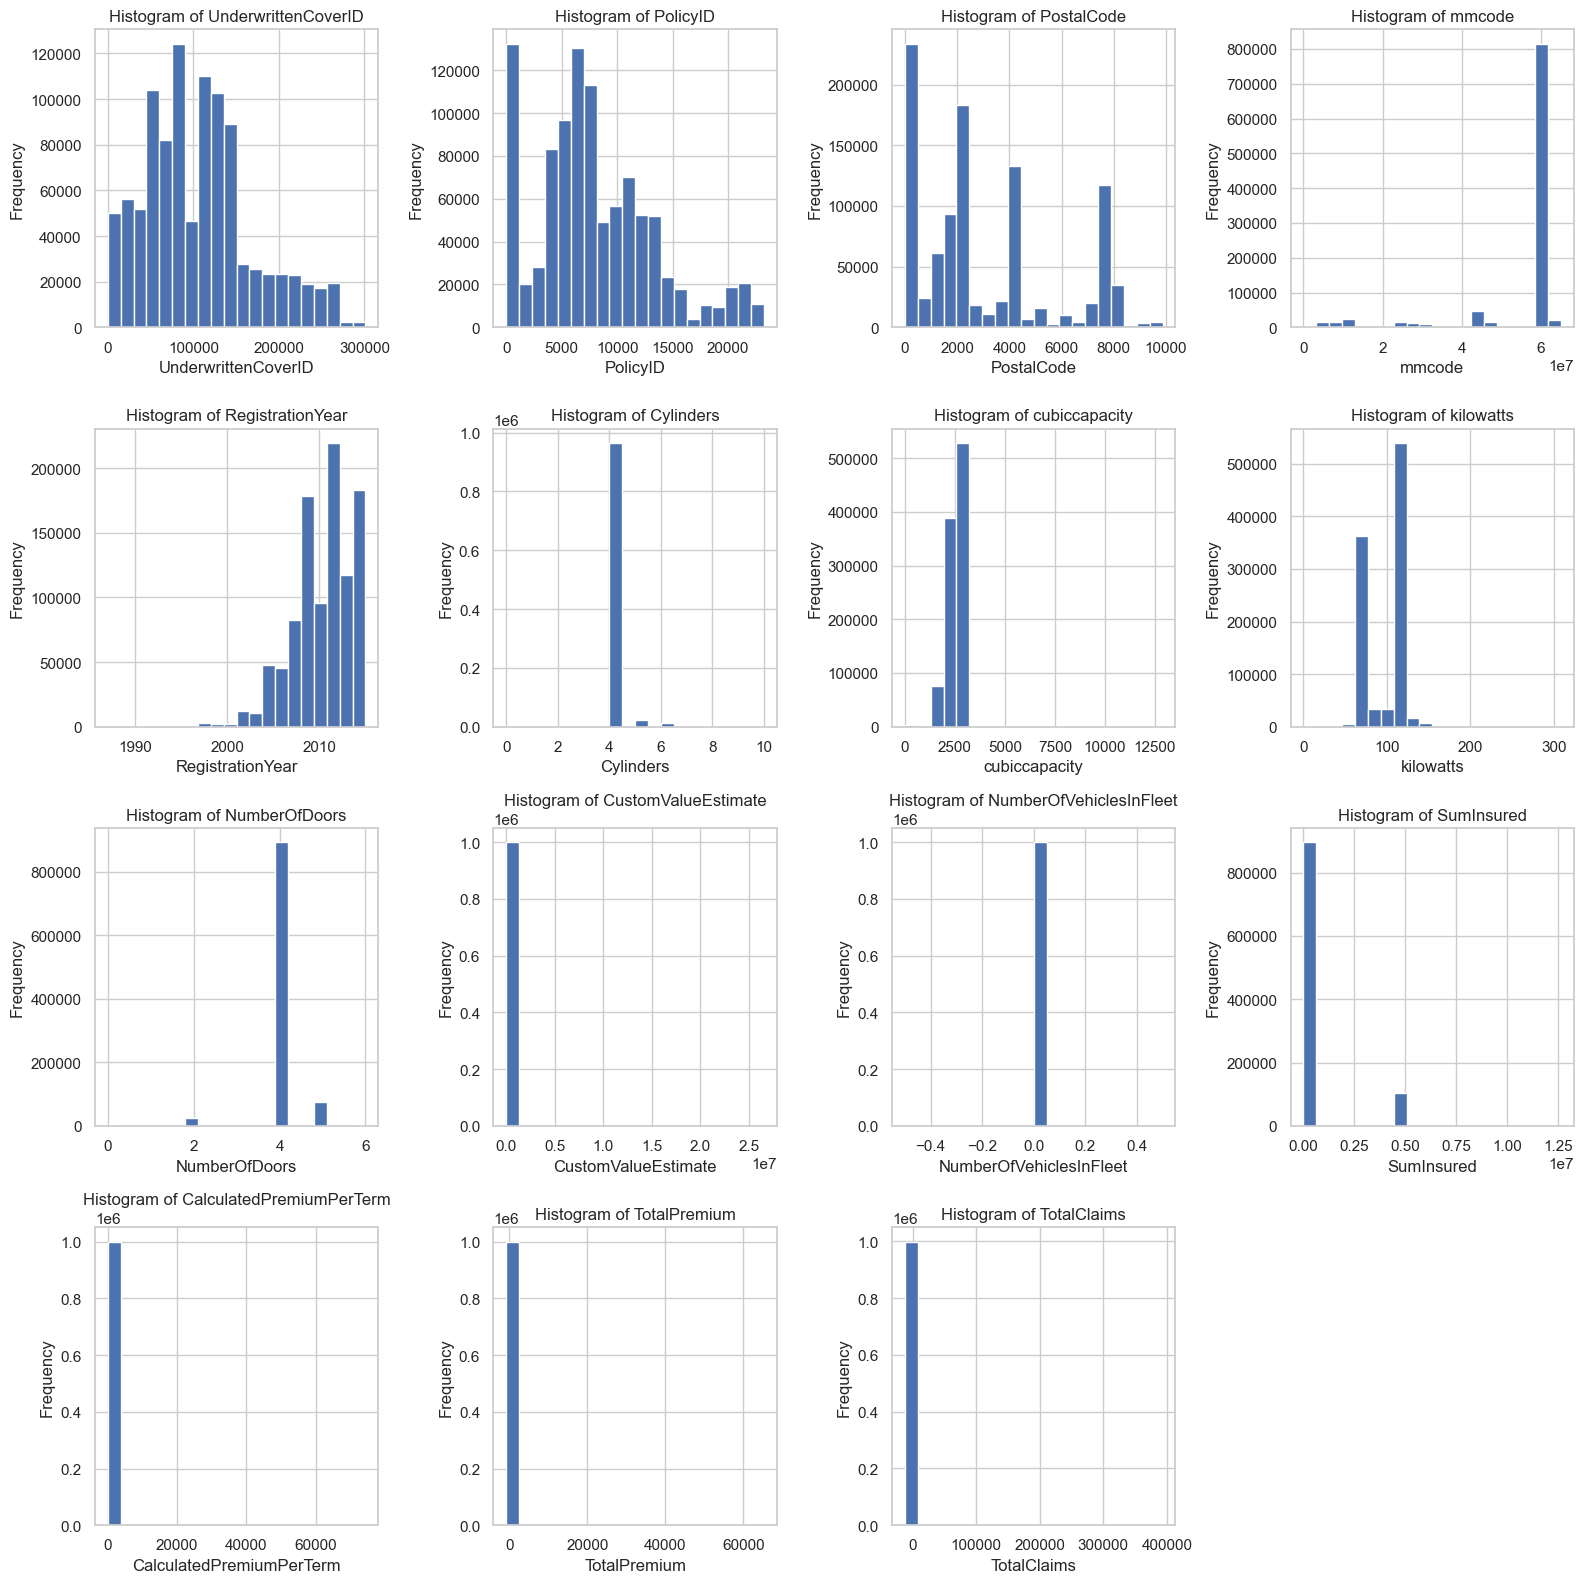

In [80]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns (4 in one figure)
num_columns = len(numerical_columns)
rows = (num_columns + 3) // 4  # Calculate number of rows needed for 4 columns each

fig, axes = plt.subplots(rows, 4, figsize=(16, rows * 4))  # Create a grid for plots

for i, col in enumerate(numerical_columns):  
    ax = axes[i // 4, i % 4]  # Determine the position in the grid
    df[col].hist(ax=ax, bins=20)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, rows * 4):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()  # Adjust the layout
plt.show()

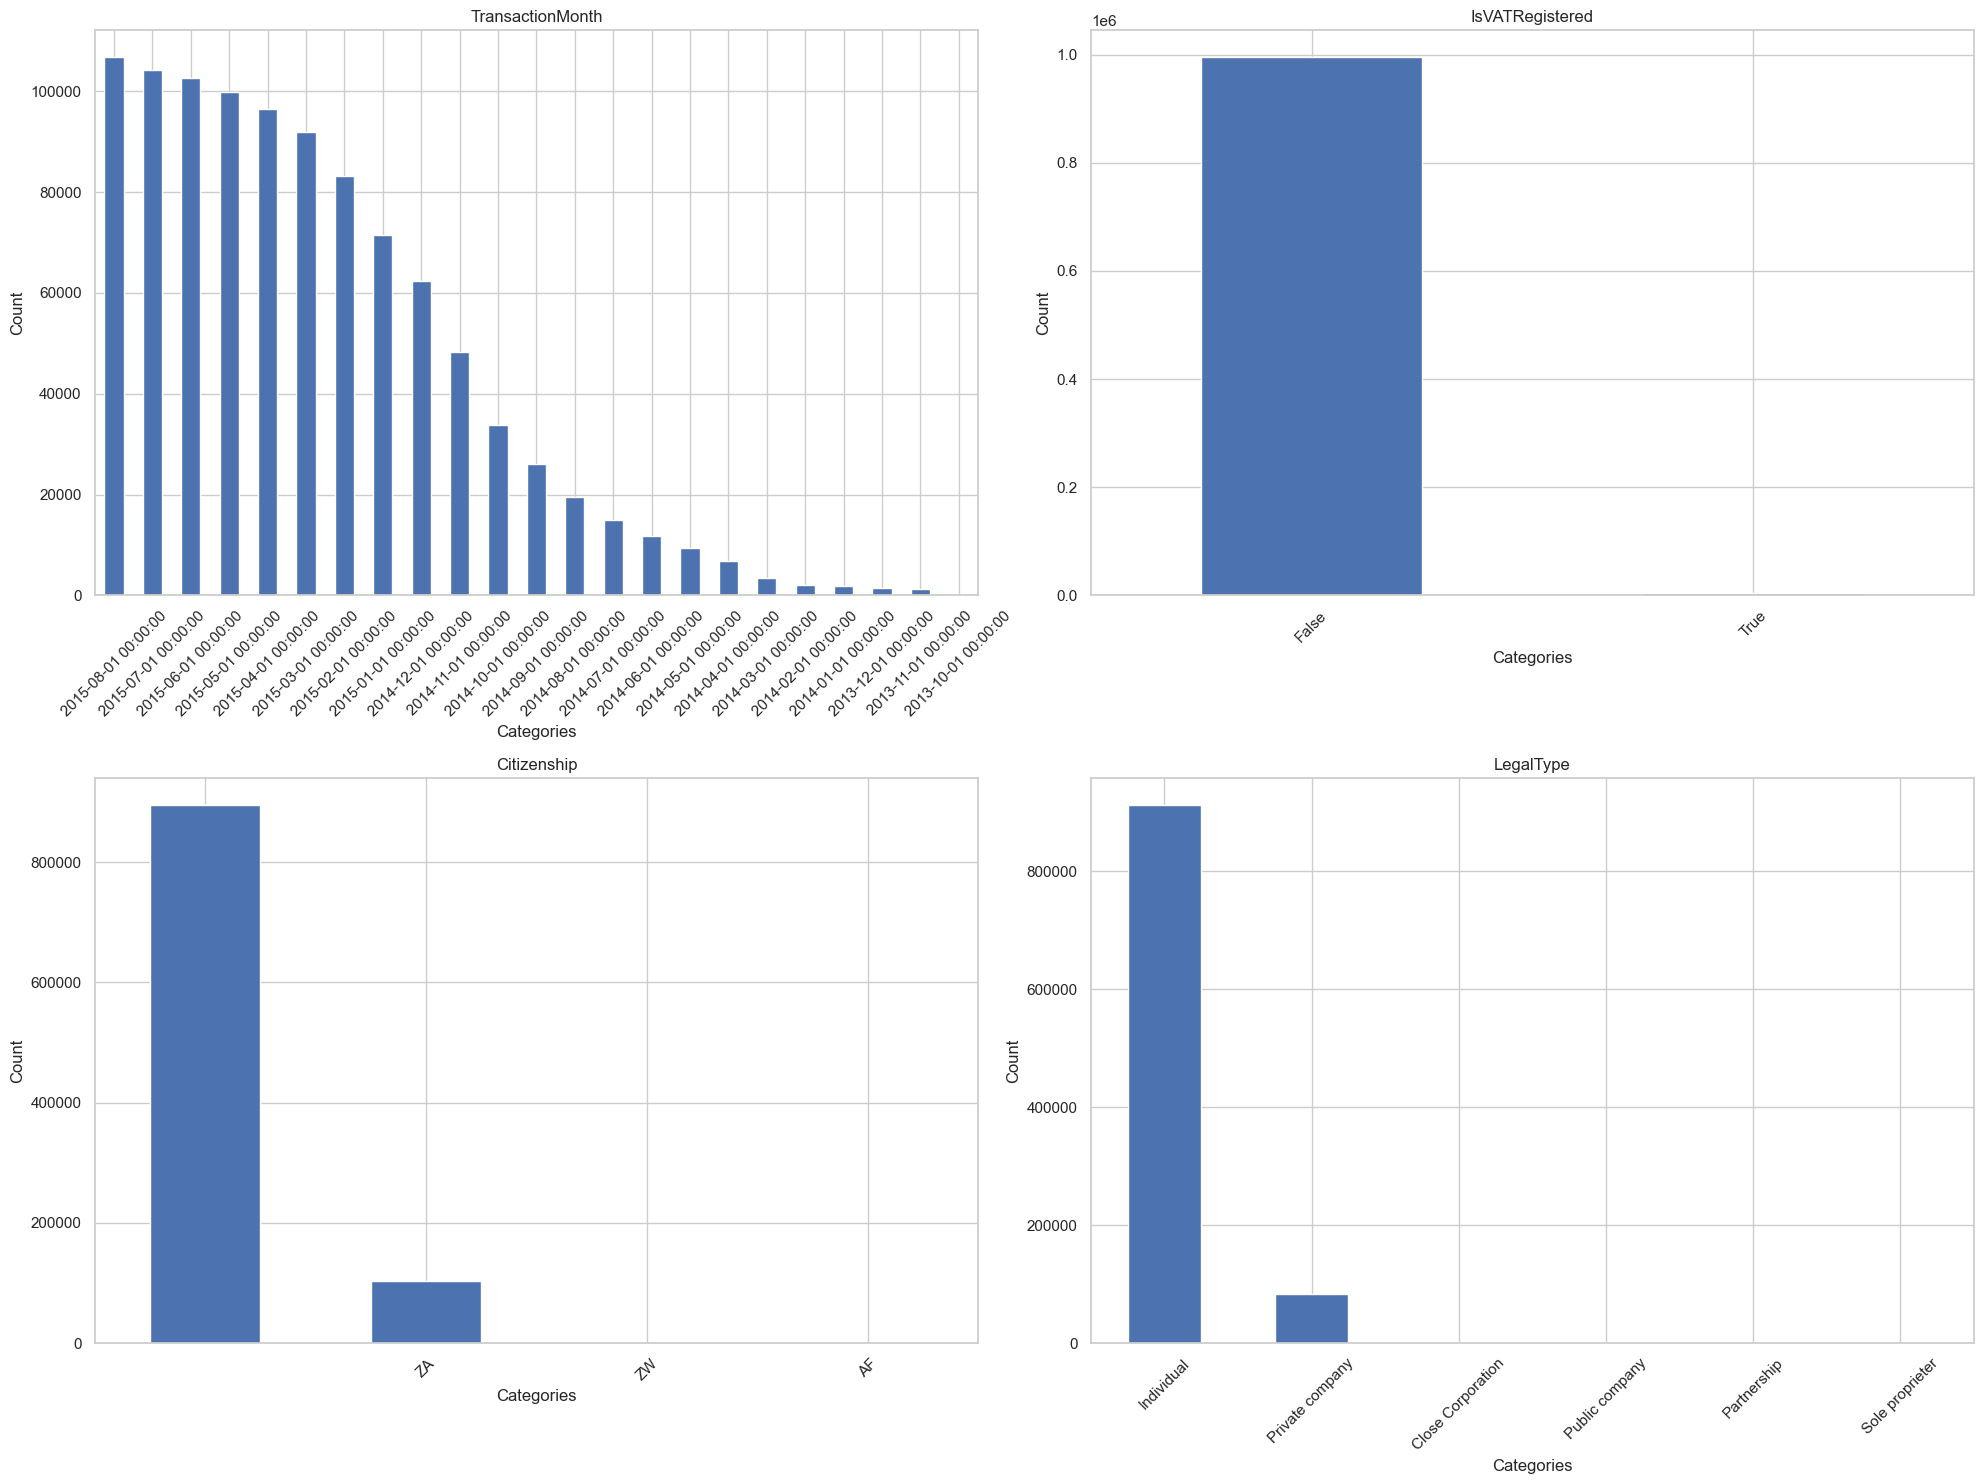

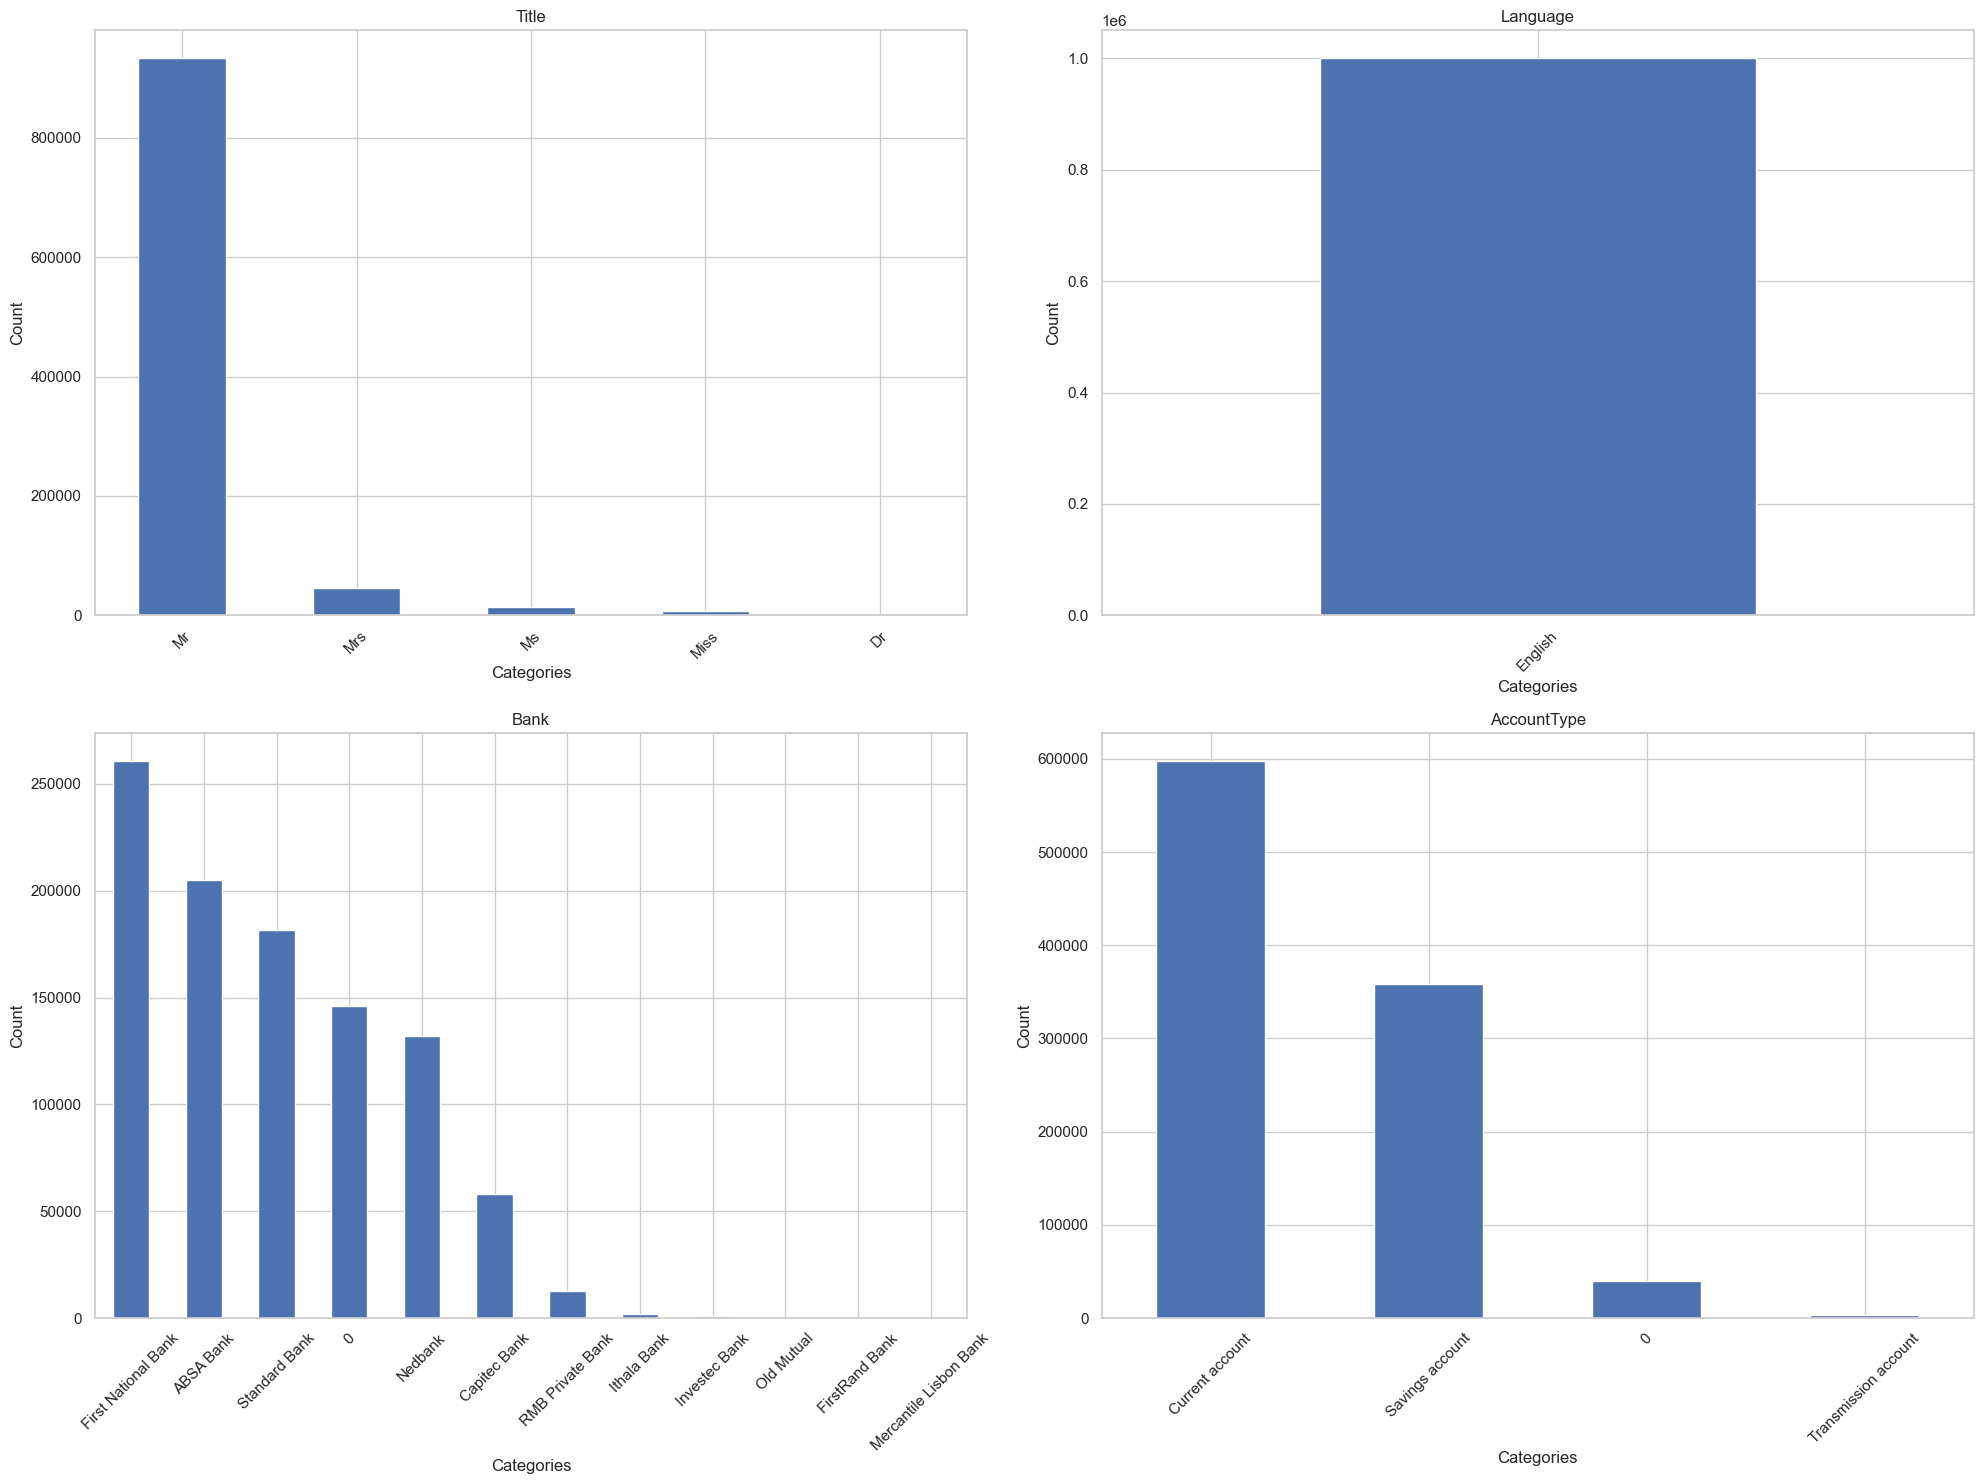

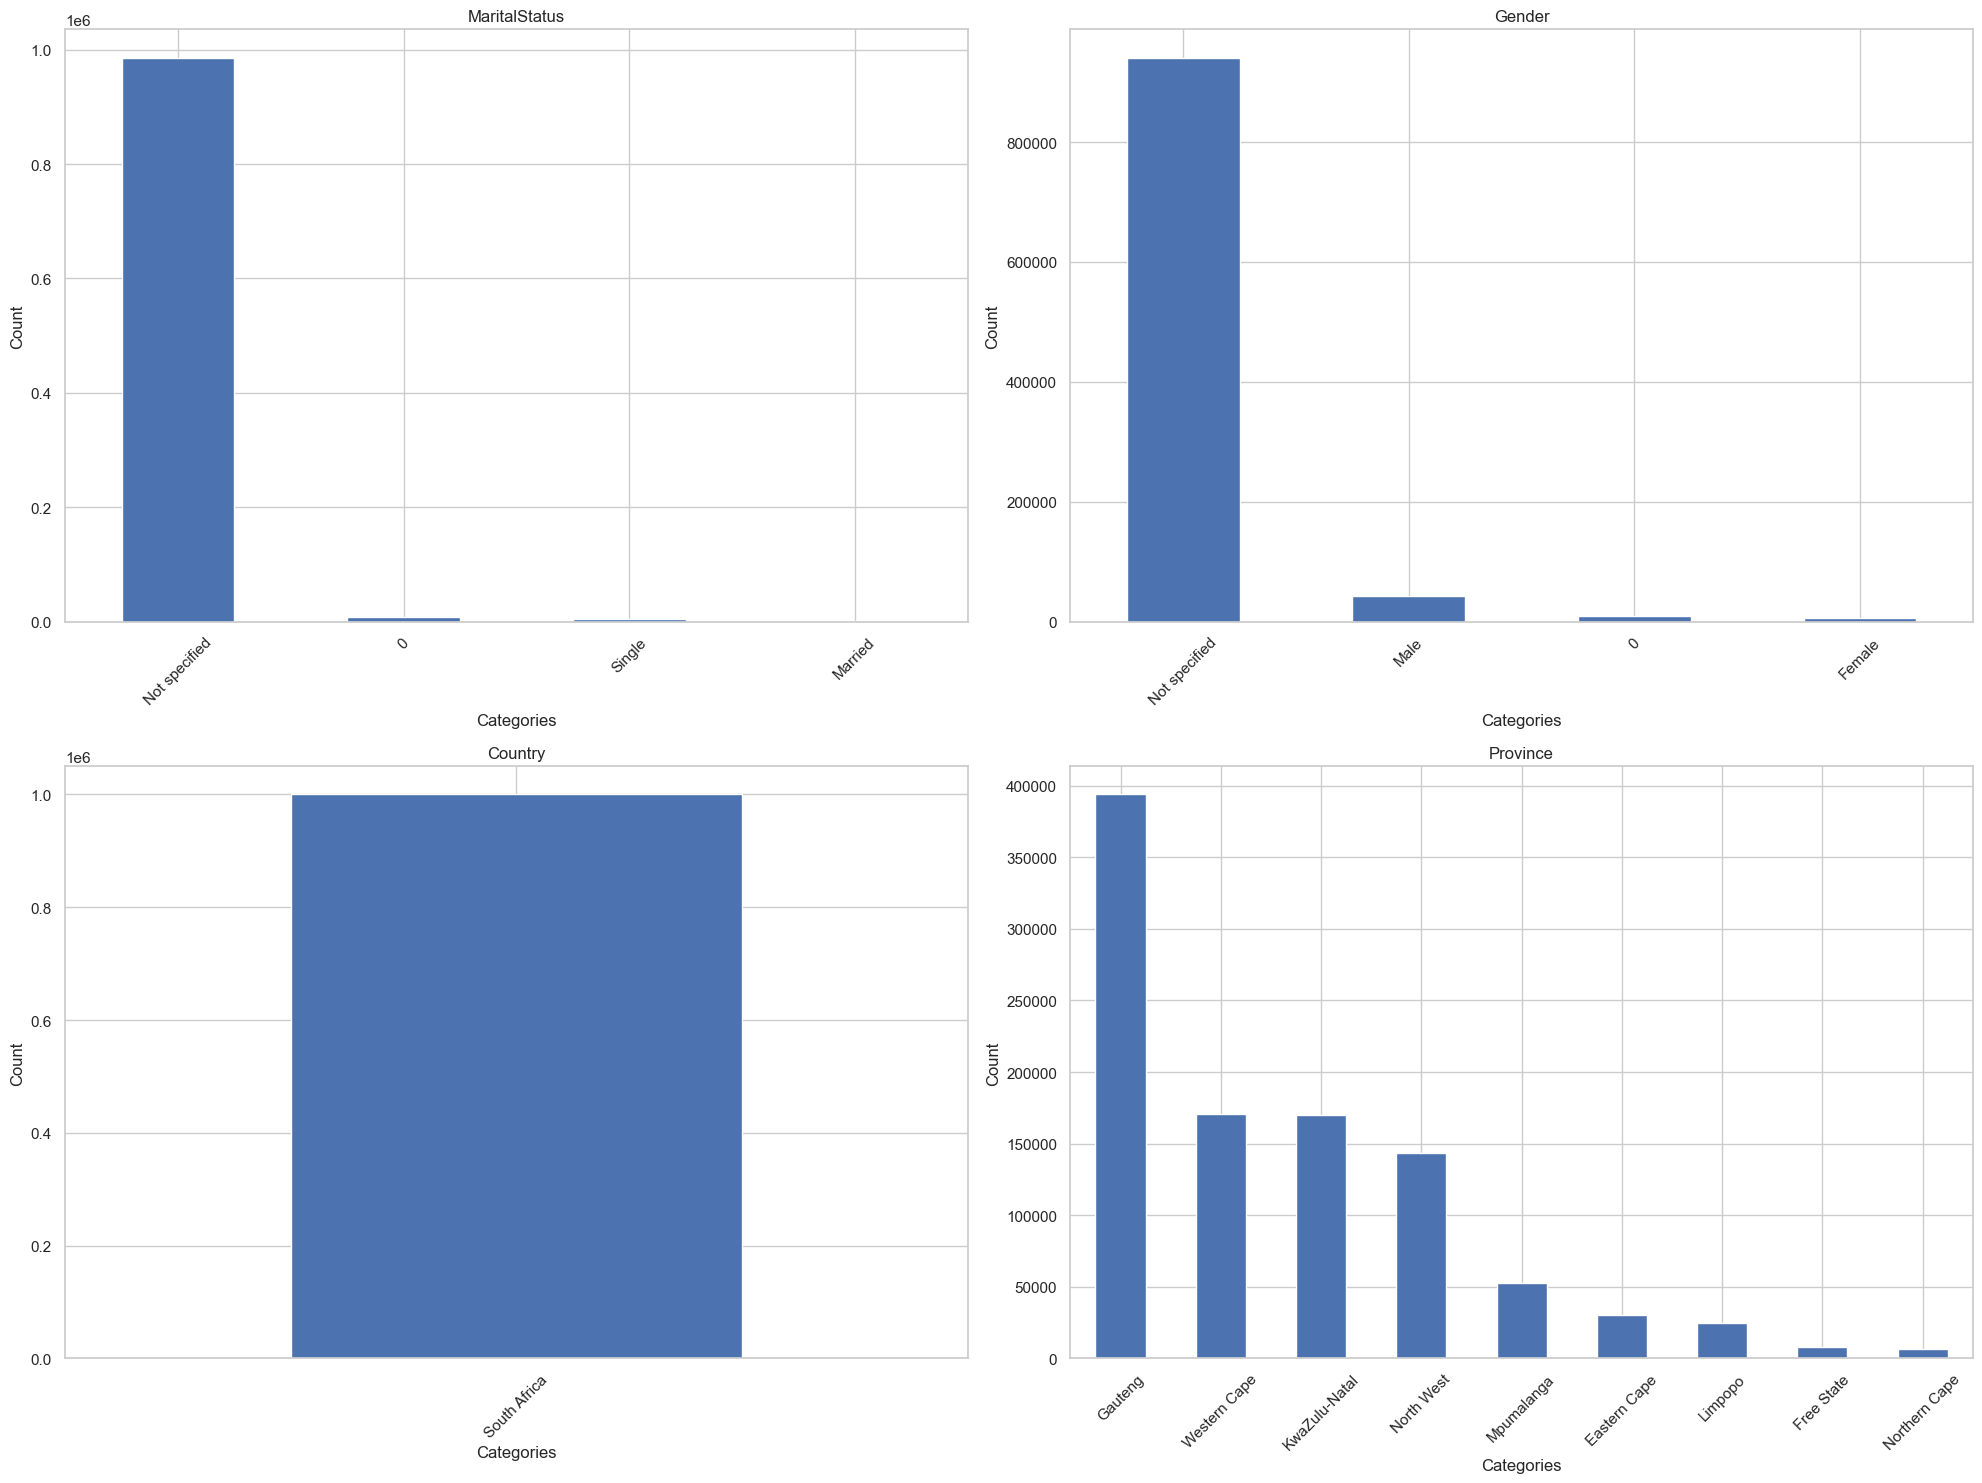

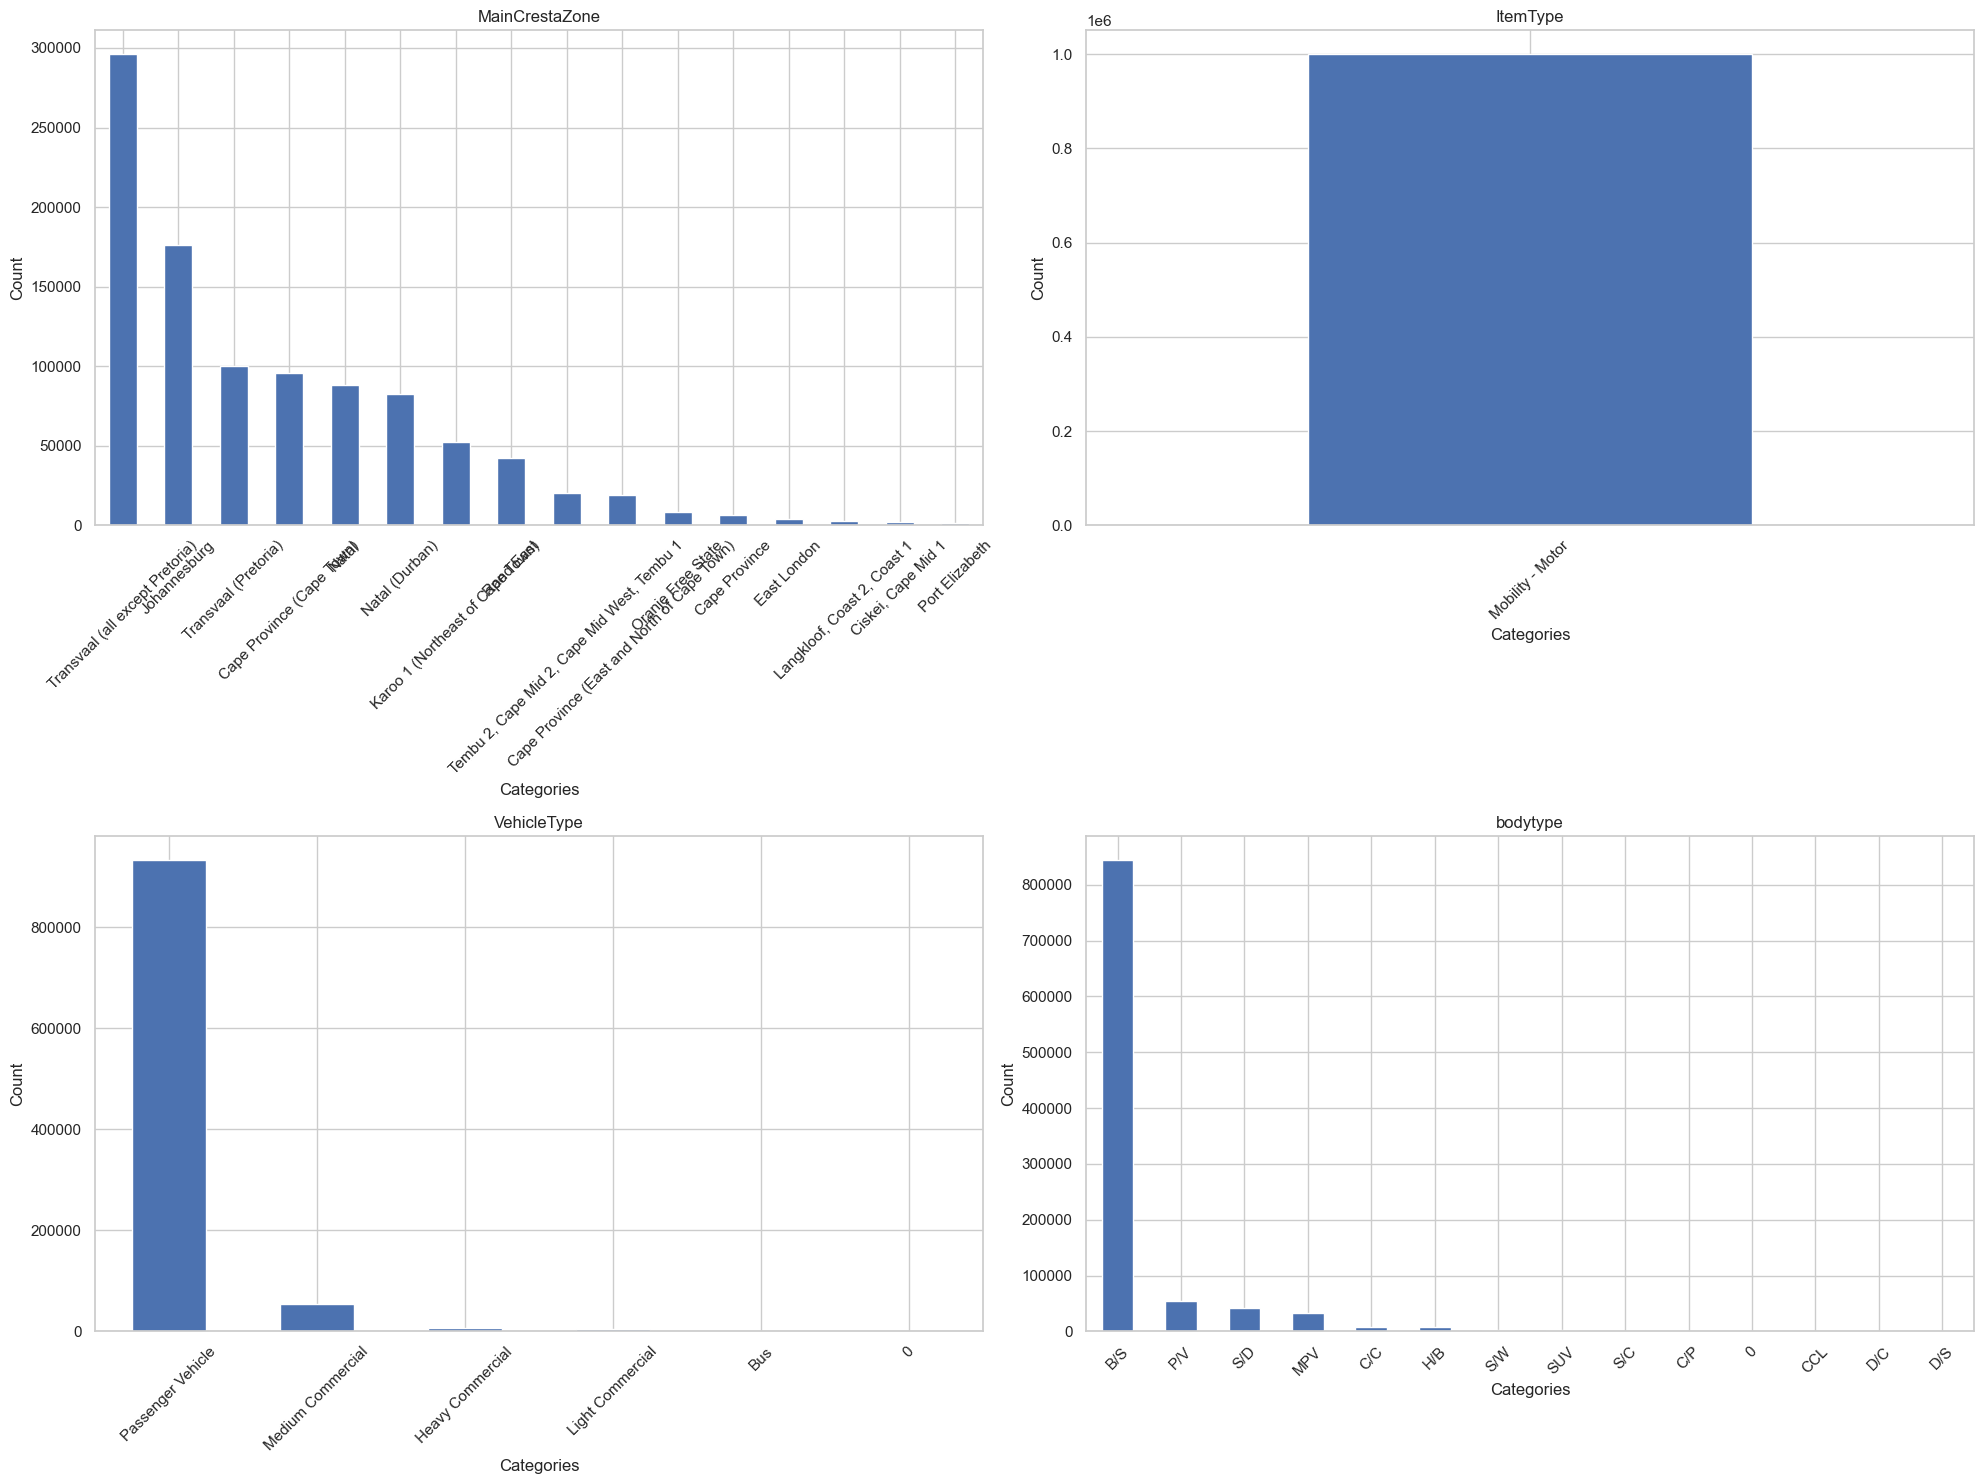

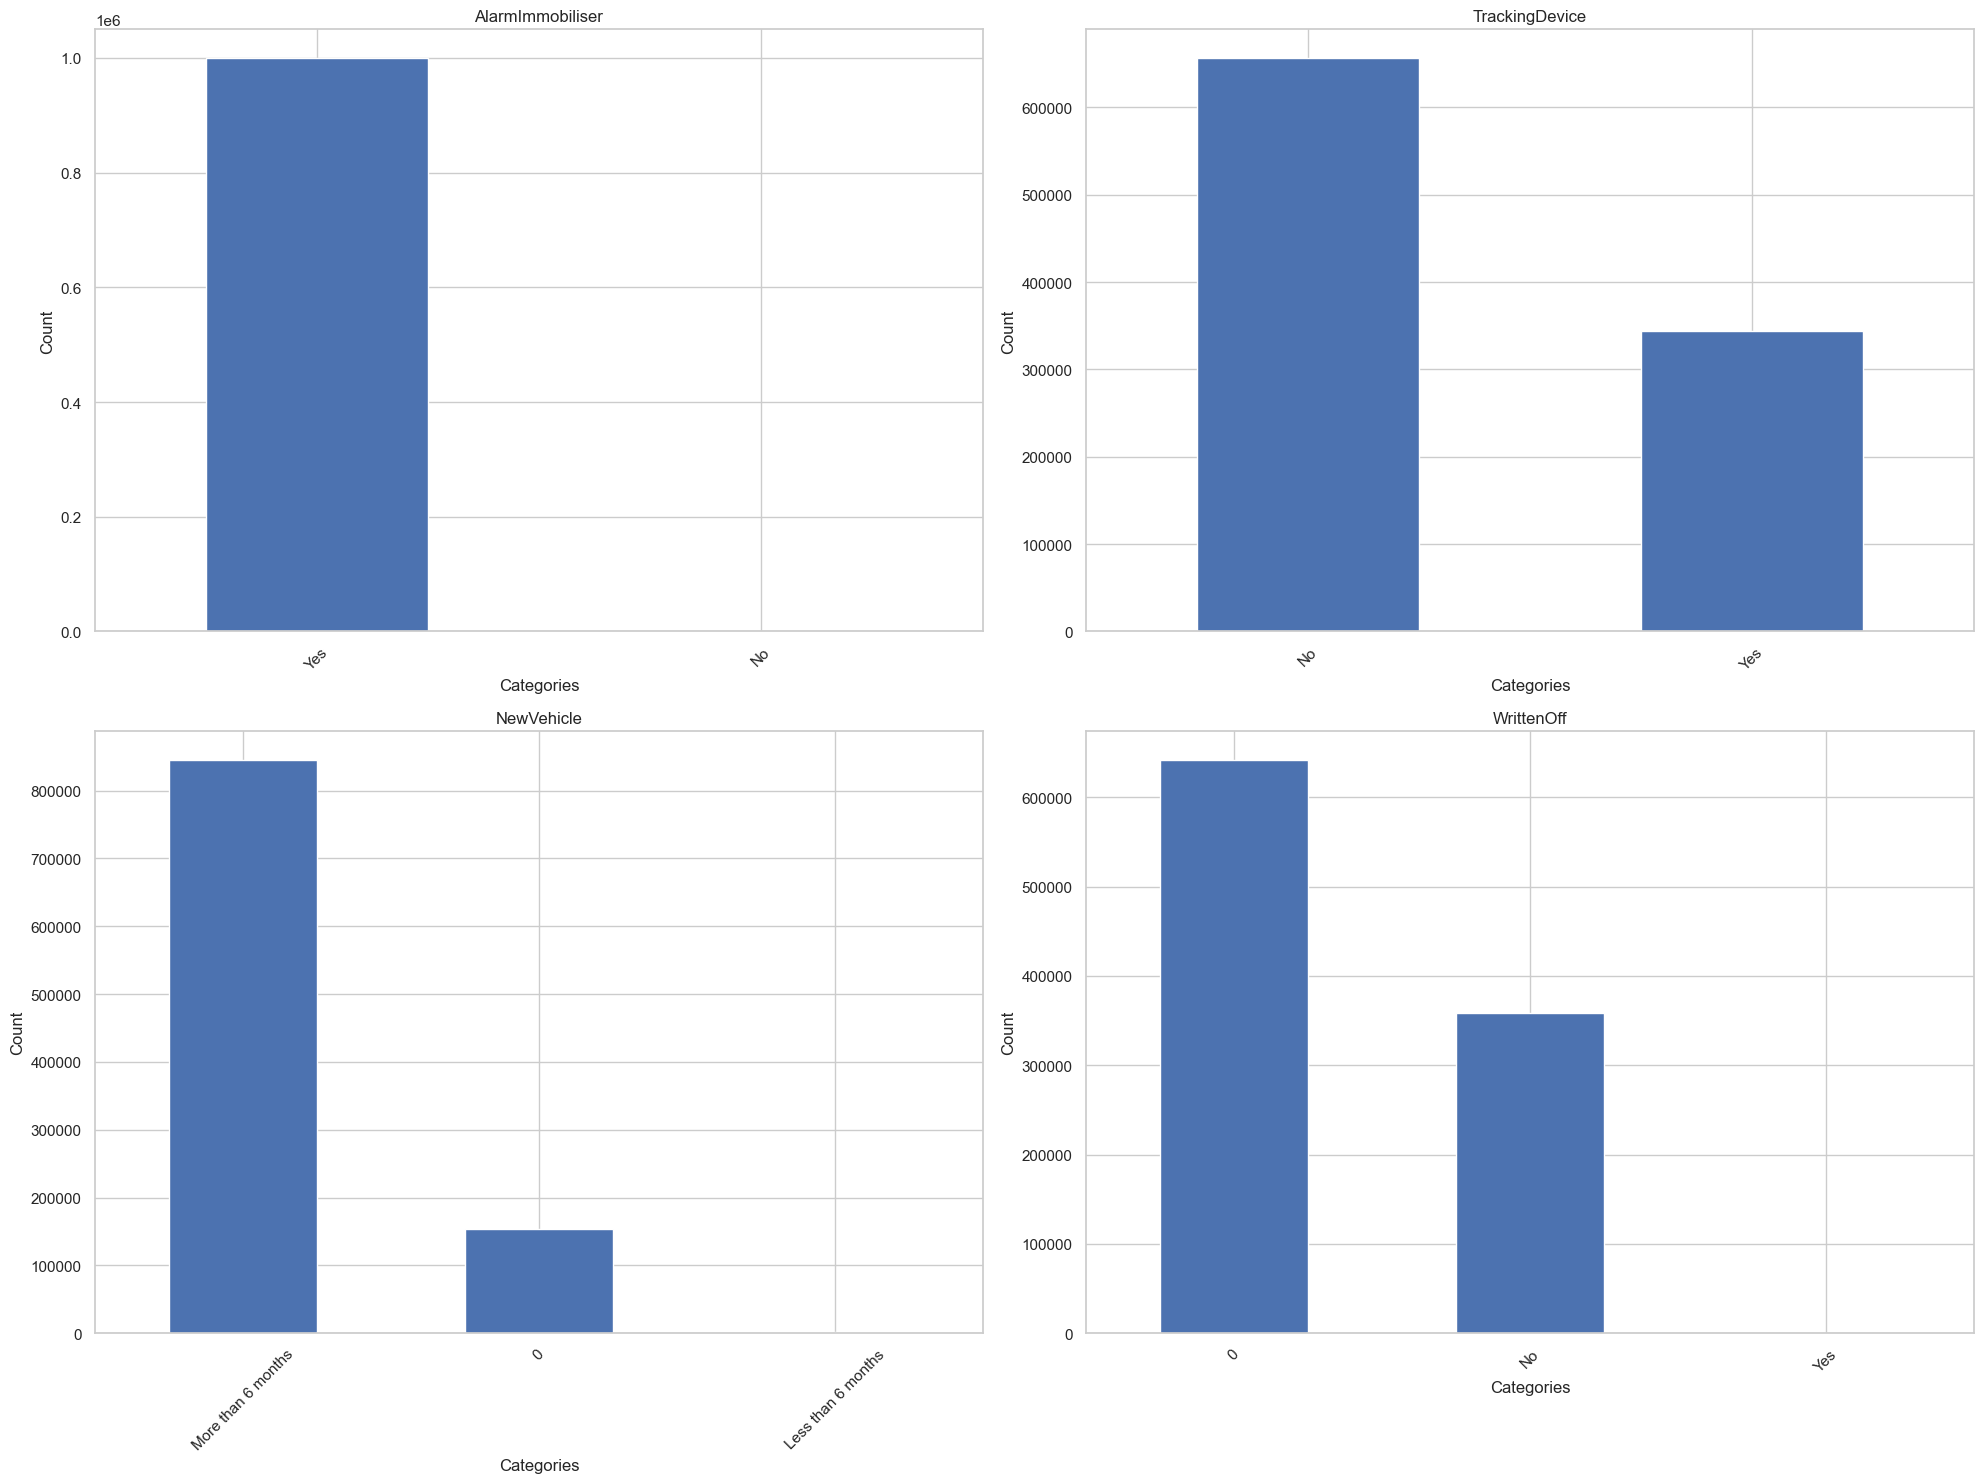

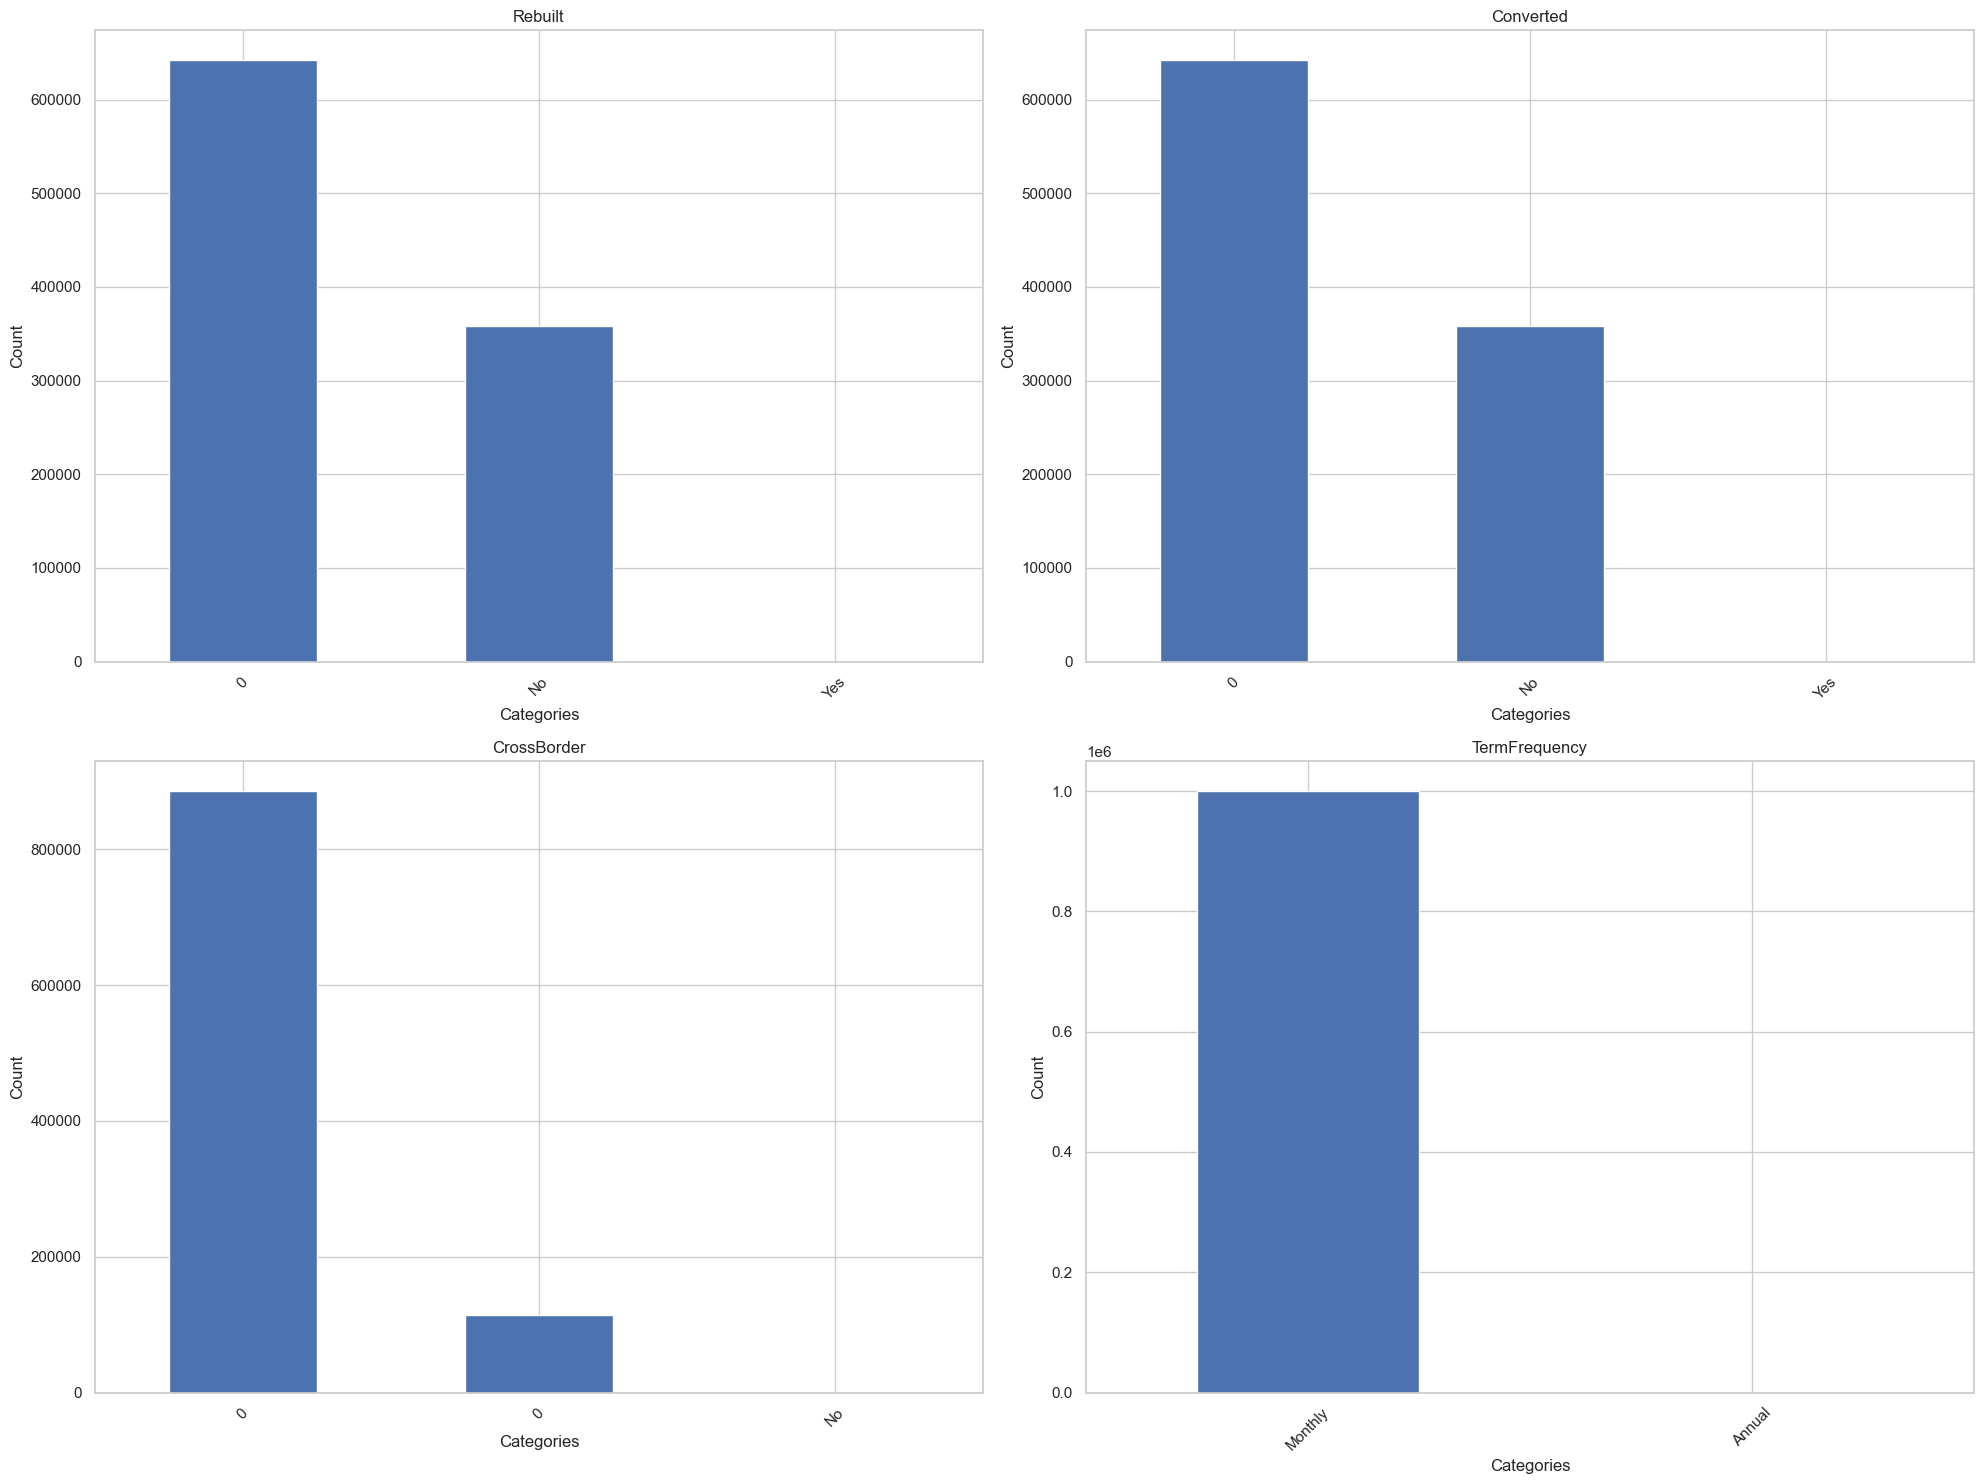

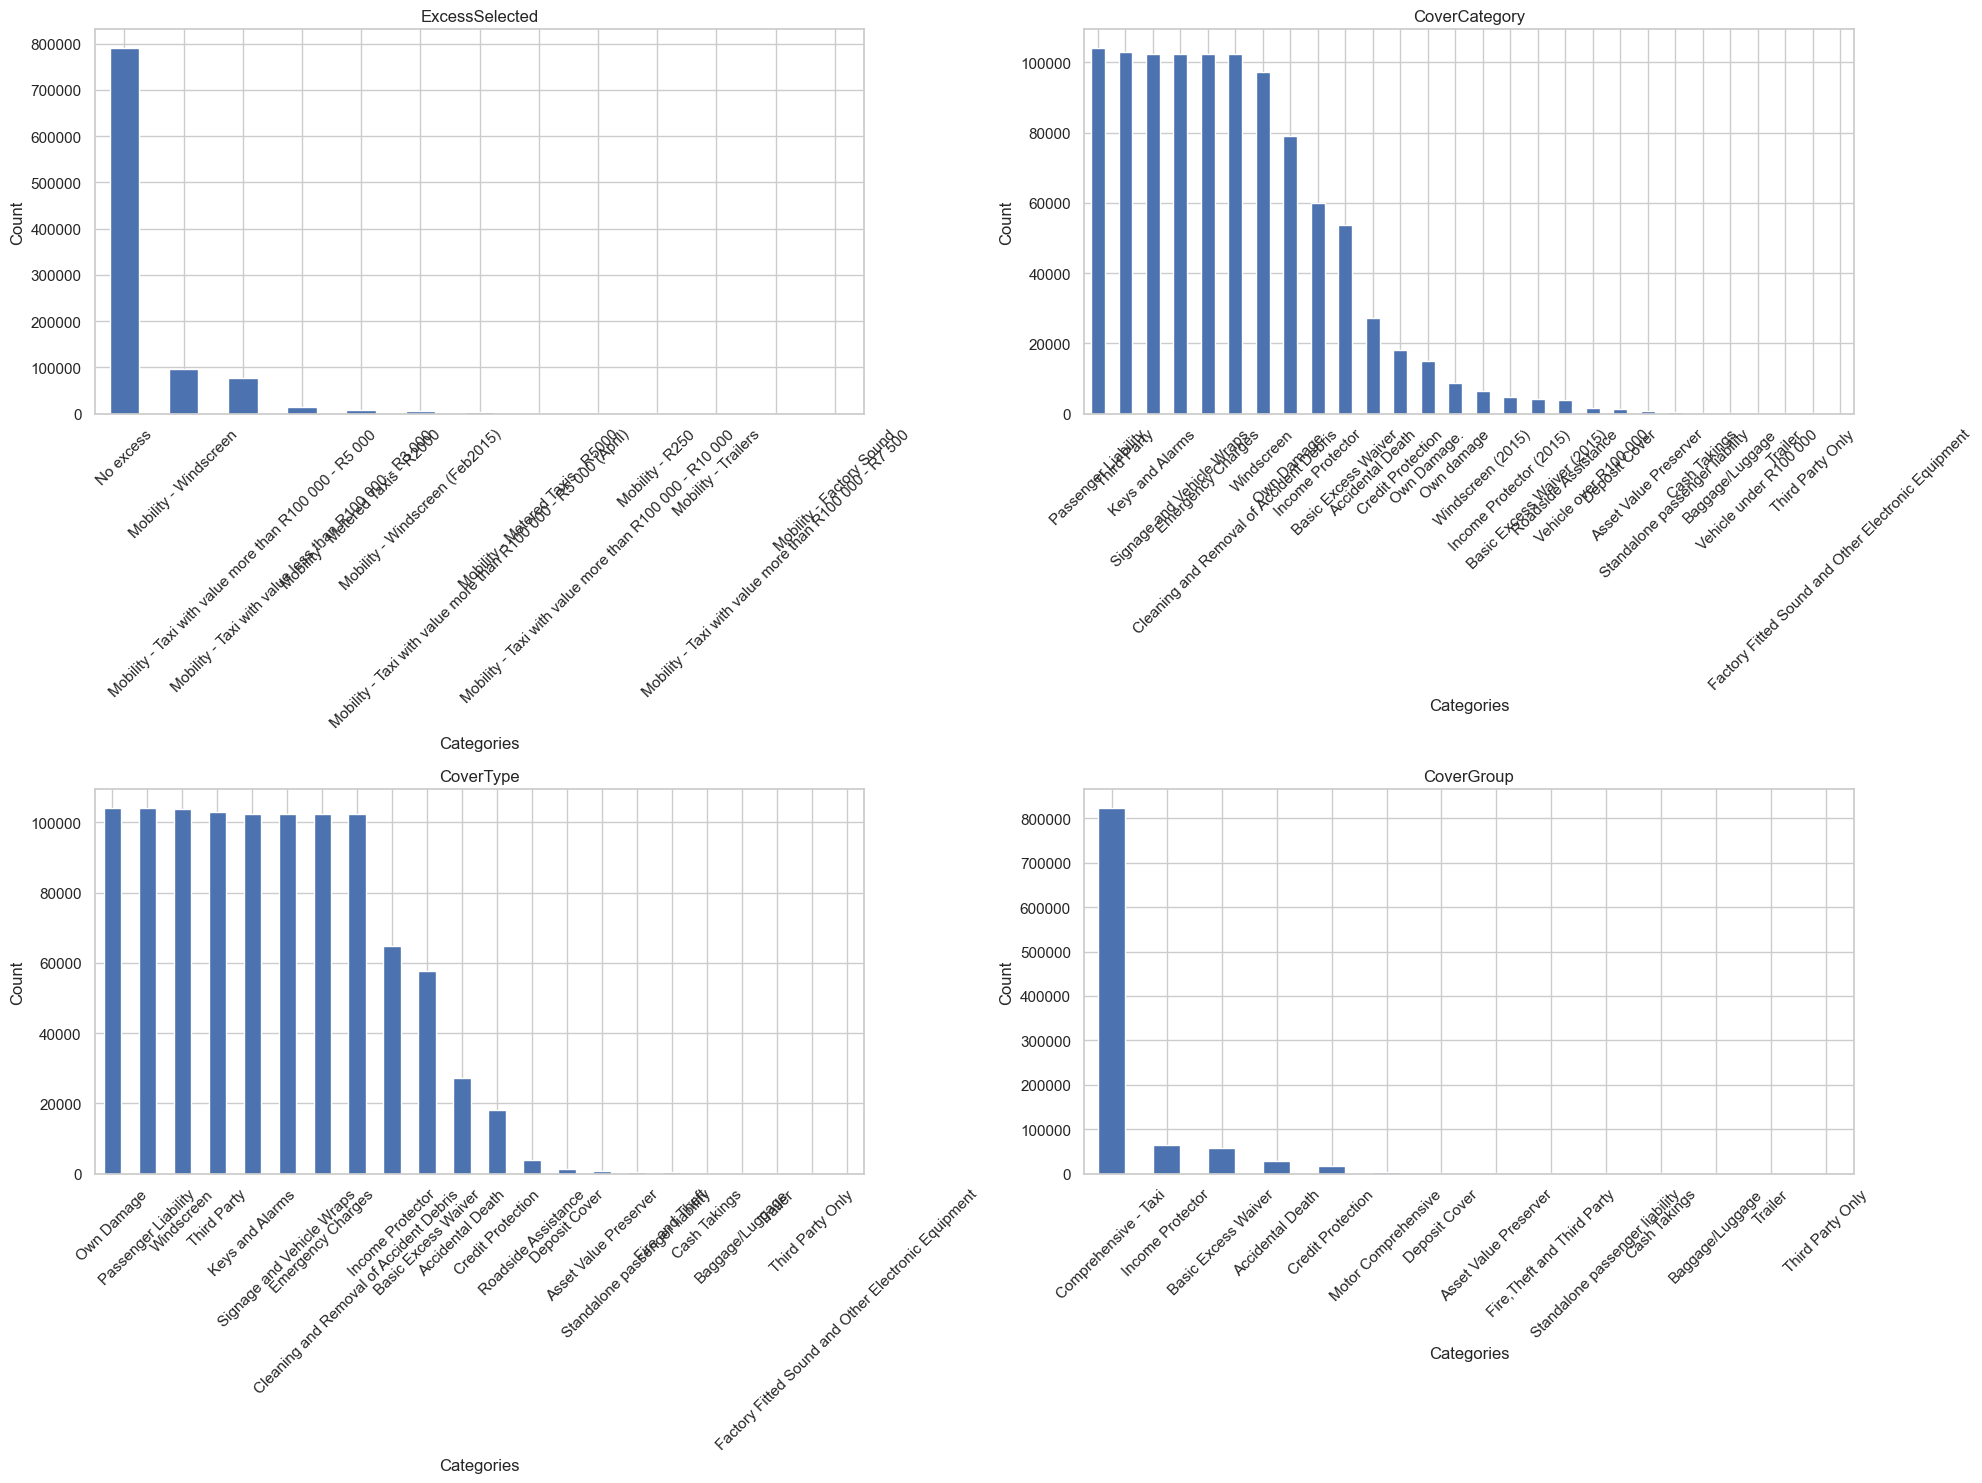

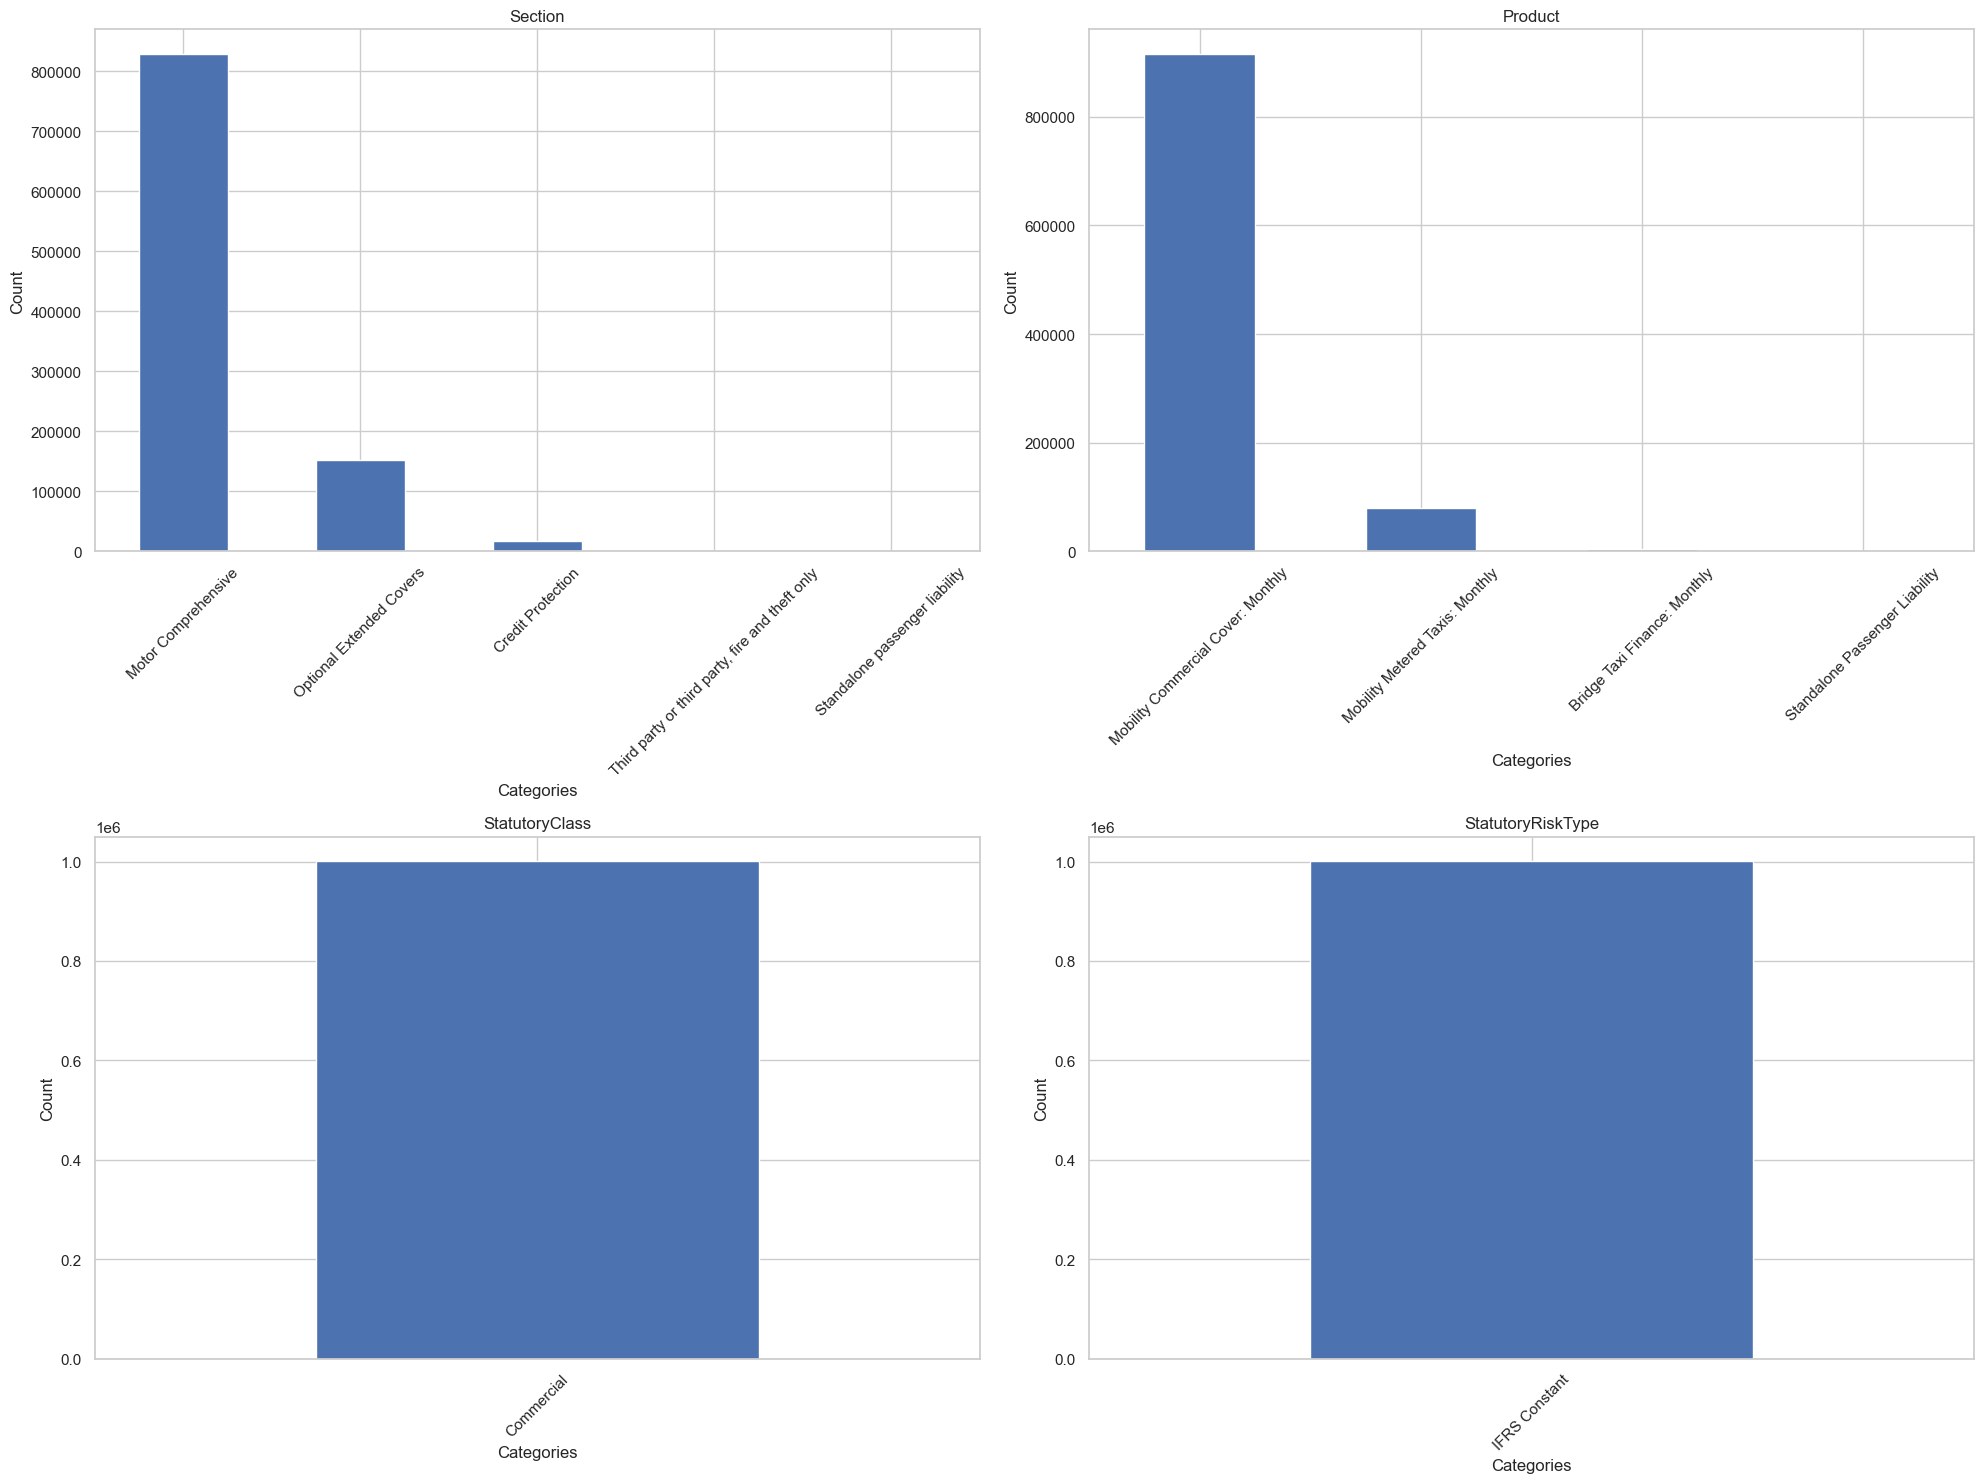

In [101]:
# Set number of columns per figure
columns_per_figure = 4
categorical_columns_1 = ['TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 
                         'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'ItemType', 'VehicleType', 
                          'bodytype',  'AlarmImmobiliser', 'TrackingDevice',  'NewVehicle', 'WrittenOff', 
                          'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 
                          'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']
# Loop through the categorical columns in chunks of four
for i in range(0, len(categorical_columns_1), columns_per_figure):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
    axes = axes.flatten()

    # Plot bar charts for the current chunk
    for j in range(columns_per_figure):
        if i + j < len(categorical_columns_1):
            column = categorical_columns_1[i + j]
            df[column].value_counts().plot(kind='bar', ax=axes[j])
            axes[j].set_title(column)
            axes[j].set_xlabel('Categories')
            axes[j].set_ylabel('Count')
            axes[j].tick_params(axis='x', rotation=45)

    # Adjust layout
    plt.tight_layout()
    plt.show()


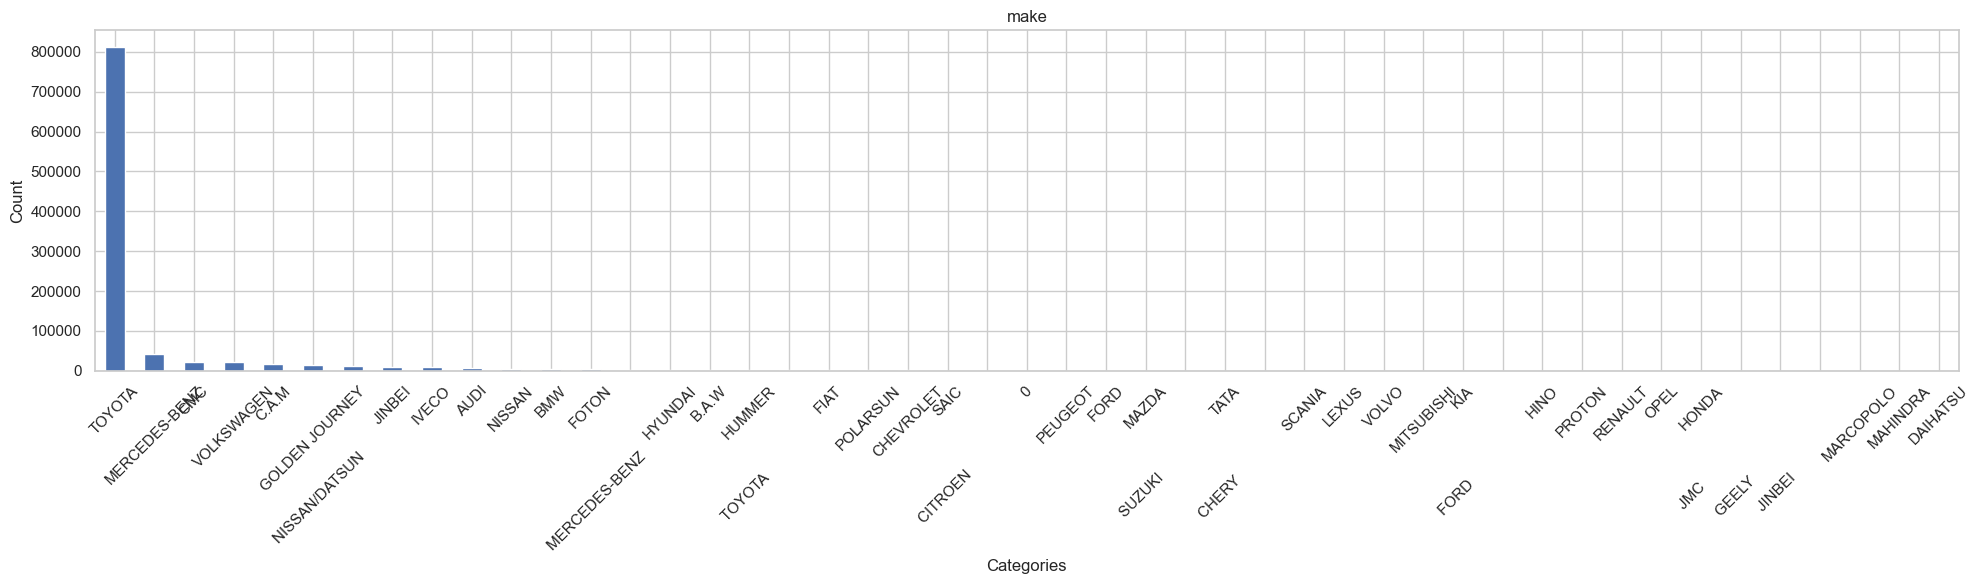

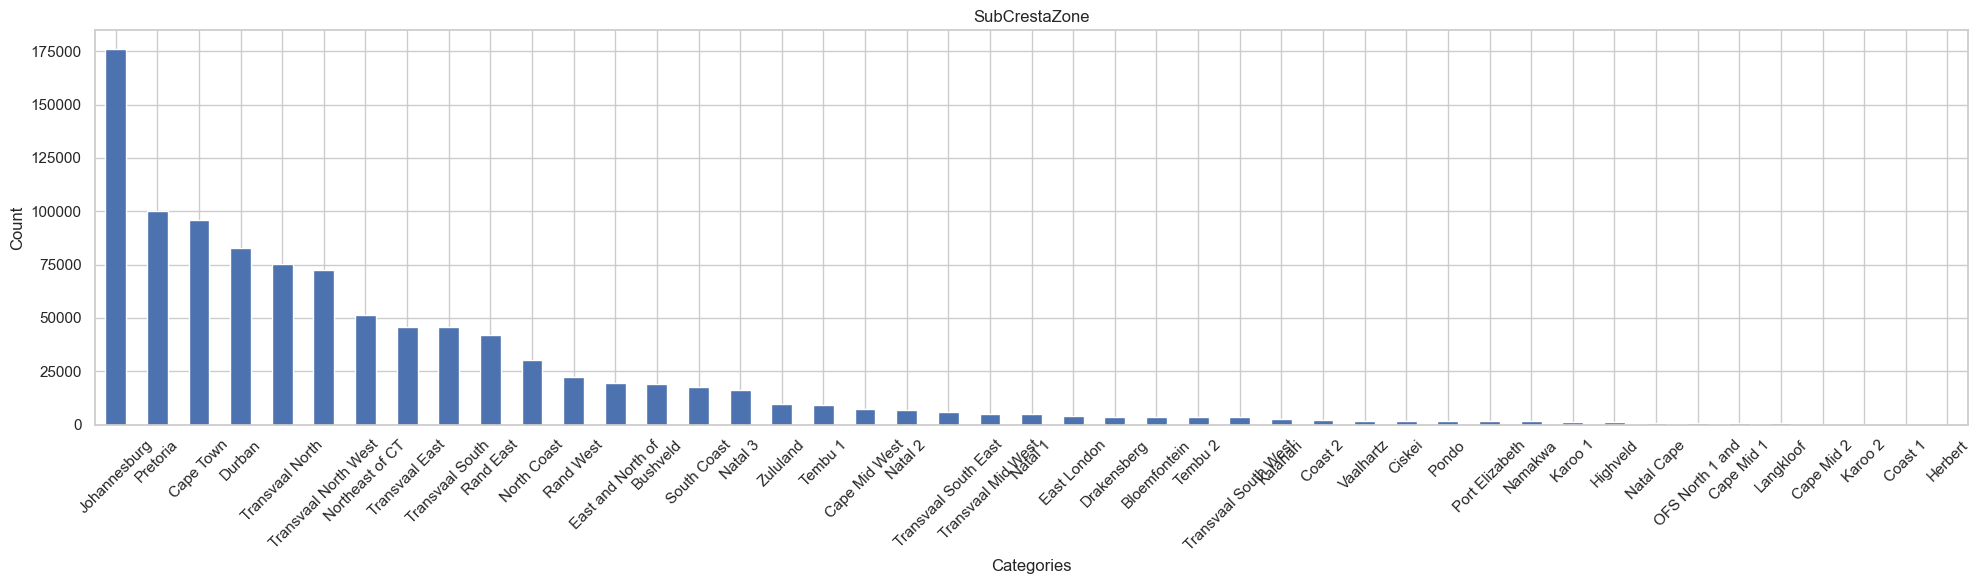

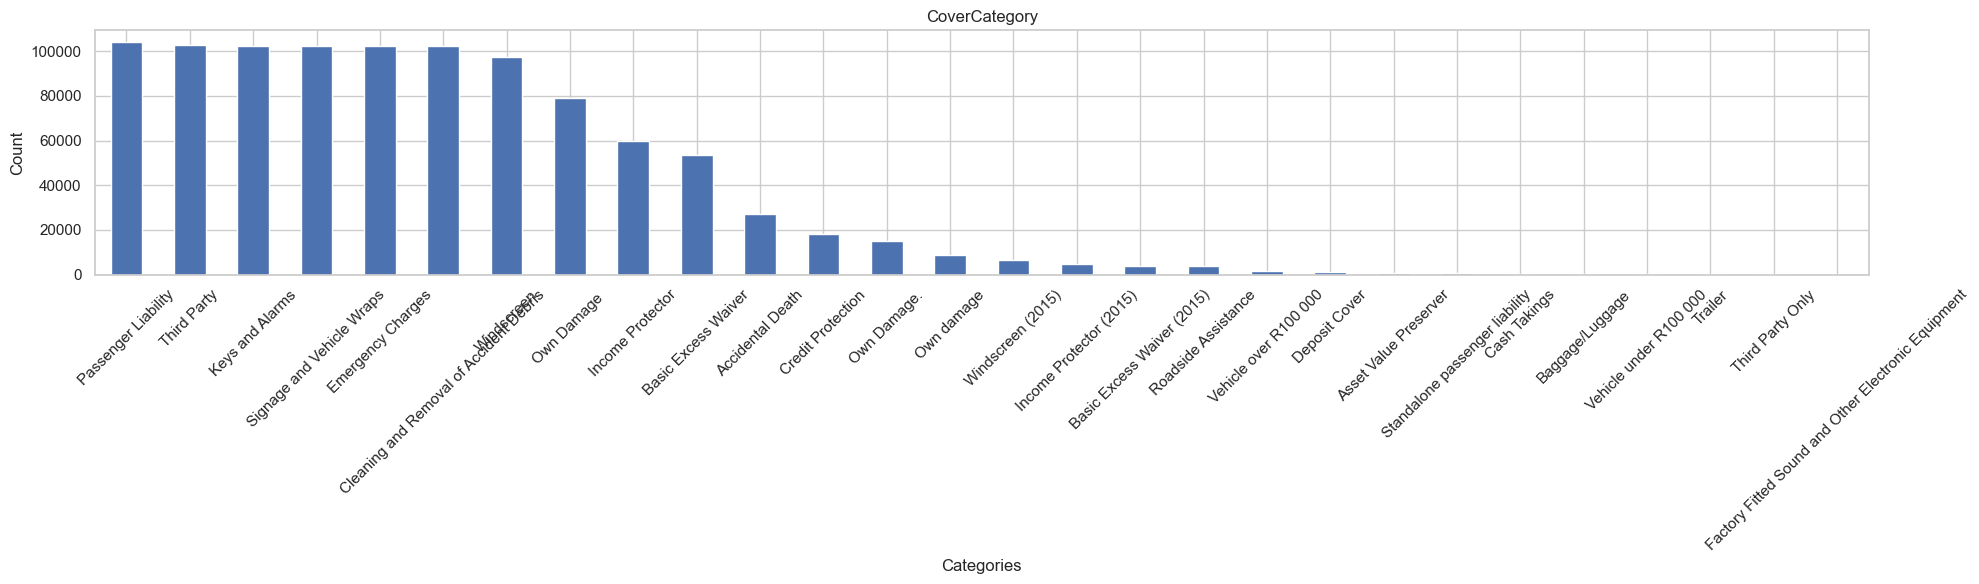

In [82]:
# List of specific categorical columns to plot
specific_columns_1 = [
    'make', 'SubCrestaZone', 'CoverCategory'
]

# Loop through the specified columns
for column in specific_columns_1:
    plt.figure(figsize=(20, 6))  # Create a new figure for each column
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

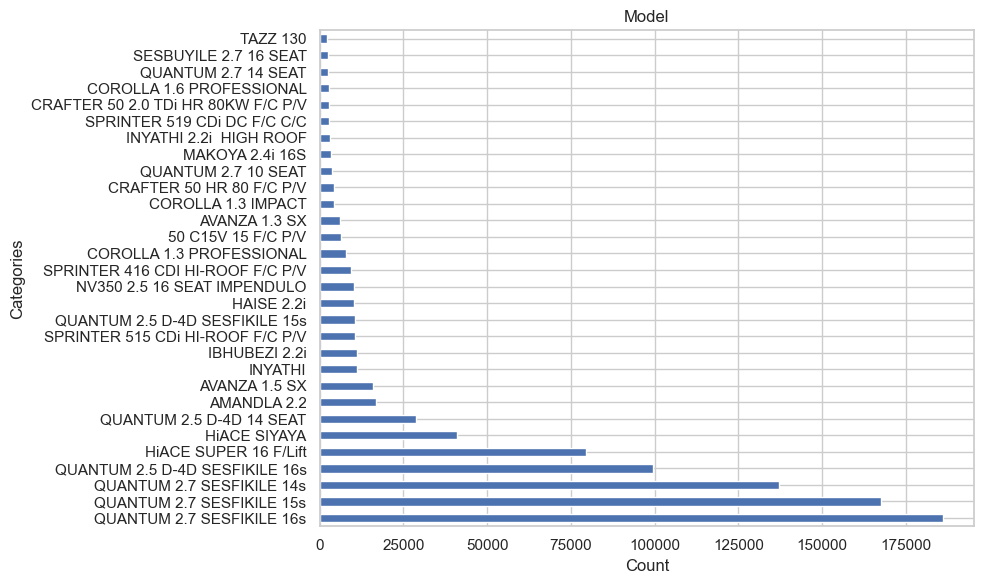

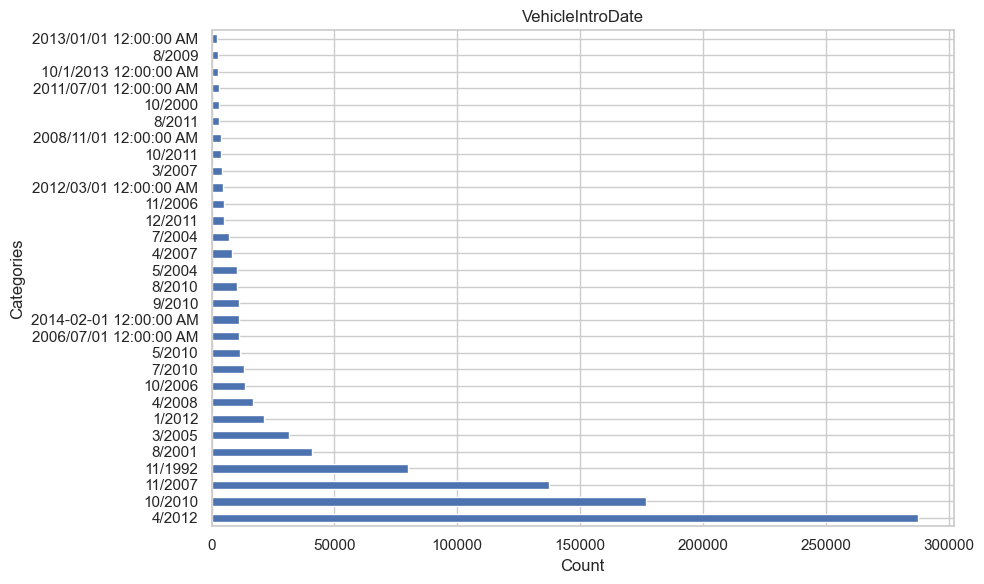

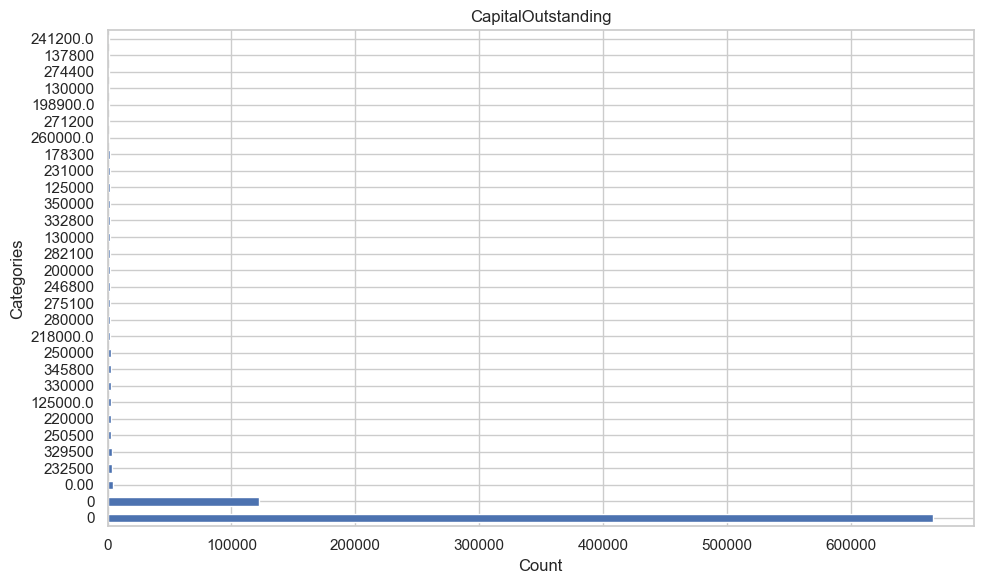

In [83]:
# List of specific categorical columns to plot
specific_columns = [
    'Model', 'VehicleIntroDate', 'CapitalOutstanding'
]

# Set the number of top categories to display
top_n = 30  

# Loop through the specified columns
for column in specific_columns:
    plt.figure(figsize=(10, 6))  # Create a new figure for each column
    value_counts = df[column].value_counts().head(top_n)  # Get top N categories
    value_counts.plot(kind='barh')  # Horizontal bar chart
    plt.title(column)
    plt.xlabel('Count')
    plt.ylabel('Categories')
    plt.tight_layout()
    plt.show()

### Total Premium vs Total Claims Analysis

This section examines the relationship between `TotalPremium` and `TotalClaims` by `PostalCode` through the following steps:

1. **Data Preparation**: Converts `TransactionMonth` to datetime.
2. **Aggregation**: Sums `TotalPremium` and `TotalClaims` by `PostalCode`.
3. **Visualization**: 
   - Scatter plots show relationships, with outliers filtered out.
4. **Correlation Analysis**: A heatmap illustrates the correlation between the two metrics.

These insights aid in identifying trends and informing decisions.


In [84]:
# Check the data types and for any missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      1000098 non-null  object 
 9   AccountType               1000098 non-null  object 
 10  MaritalStatus             1000098 non-null  object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [85]:
# Convert TransactionMonth to datetime if it's not in that format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Grouping by PostalCode and getting the sum of TotalPremium and TotalClaims
grouped_df = df.groupby('PostalCode').agg({'TotalPremium':'sum', 'TotalClaims':'sum'}).reset_index()

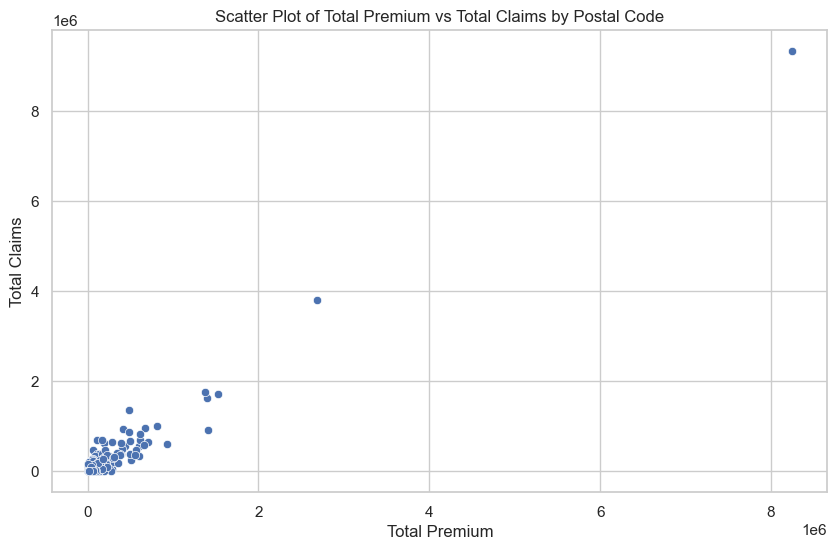

In [86]:
import seaborn as sns
# Scatter Plot to visualize relationship between TotalPremium and TotalClaims
plt.figure(figsize=(10,6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=grouped_df)
plt.title('Scatter Plot of Total Premium vs Total Claims by Postal Code')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.show()

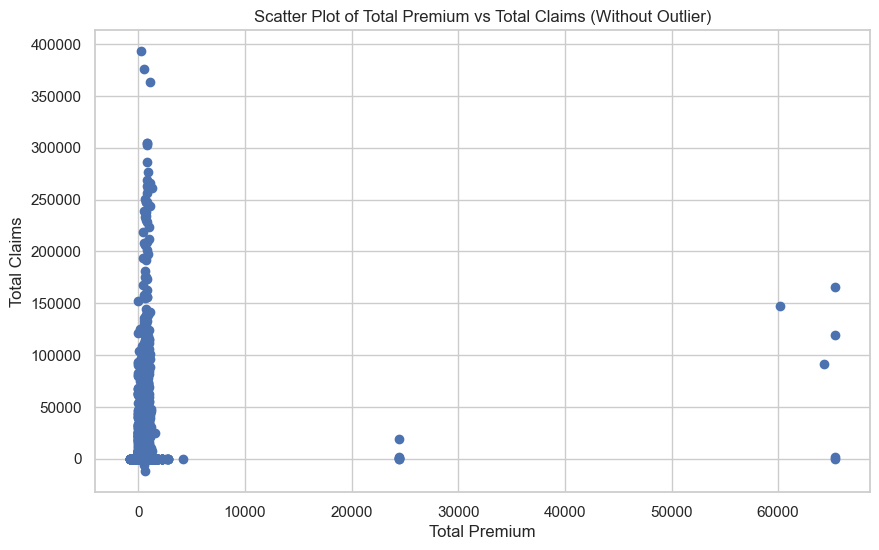

In [87]:
import matplotlib.pyplot as plt

# Set the threshold for the outlier
threshold = 4000000  # Adjust based on the visible outlier in your plot

# Filter out the outlier
filtered_df = df[df['TotalPremium'] < threshold]

# Create the scatter plot without the outlier
plt.figure(figsize=(10,6))
plt.scatter(filtered_df['TotalPremium'], filtered_df['TotalClaims'])
plt.title('Scatter Plot of Total Premium vs Total Claims (Without Outlier)')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.show()

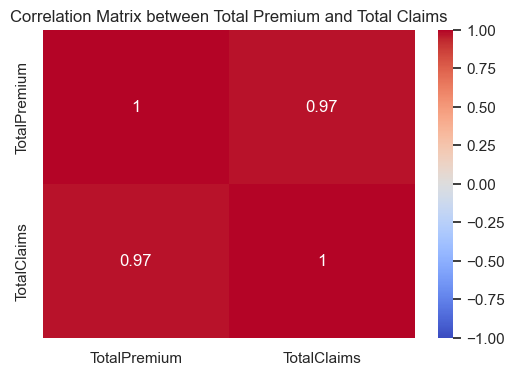

In [88]:
# Correlation Matrix between TotalPremium and TotalClaims
corr_matrix = grouped_df[['TotalPremium', 'TotalClaims']].corr()

# Plotting the Correlation Matrix
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Total Premium and Total Claims')
plt.show()

### Insurance Trends Analysis by Province

This section analyzes insurance trends over time using the dataset, focusing on `CoverType`, `CalculatedPremiumPerTerm`, and vehicle `make` across different provinces. The steps include:

1. **Data Loading**: The dataset is loaded and the structure is reviewed.
2. **Data Preparation**: The `TransactionMonth` is converted to datetime format.
3. **Aggregation by Province**: The data is grouped to analyze:
   - Count of `CoverType` per province over time.
   - Average `CalculatedPremiumPerTerm`.
   - Count of vehicles (`make`) over time.
4. **Visualizations**: 
   - Line plots show trends in insurance cover types and average premiums by province.
   - A separate plot depicts trends of vehicle makes over time.

These analyses provide insights into insurance trends, helping to inform strategy and decision-making.


In [89]:
# Convert 'TransactionMonth' to a datetime format if it's not already
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Group by Province and analyze the change in 'CoverType', 'CalculatedPremiumPerTerm', 'make', etc.
province_grouped = df.groupby(['Province', 'TransactionMonth']).agg({
    'CoverType': 'count',  # Number of cover types in a province over time
    'CalculatedPremiumPerTerm': 'mean',  # Average premium over time
    'make': 'count'  # Number of vehicles over time
}).reset_index()

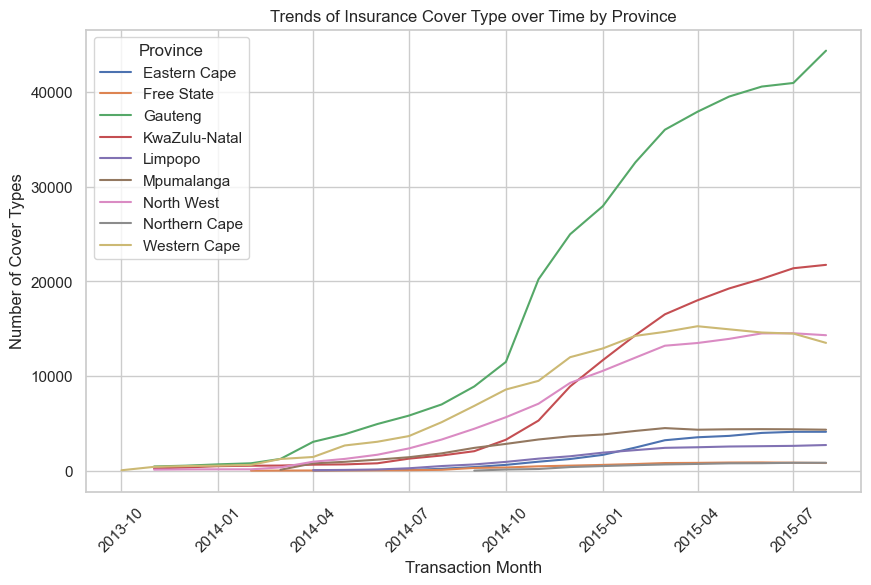

In [90]:
# Plotting trends of insurance cover type per province over time
plt.figure(figsize=(10,6))
sns.lineplot(data=province_grouped, x='TransactionMonth', y='CoverType', hue='Province')
plt.title('Trends of Insurance Cover Type over Time by Province')
plt.xlabel('Transaction Month')
plt.ylabel('Number of Cover Types')
plt.xticks(rotation=45)
plt.show()

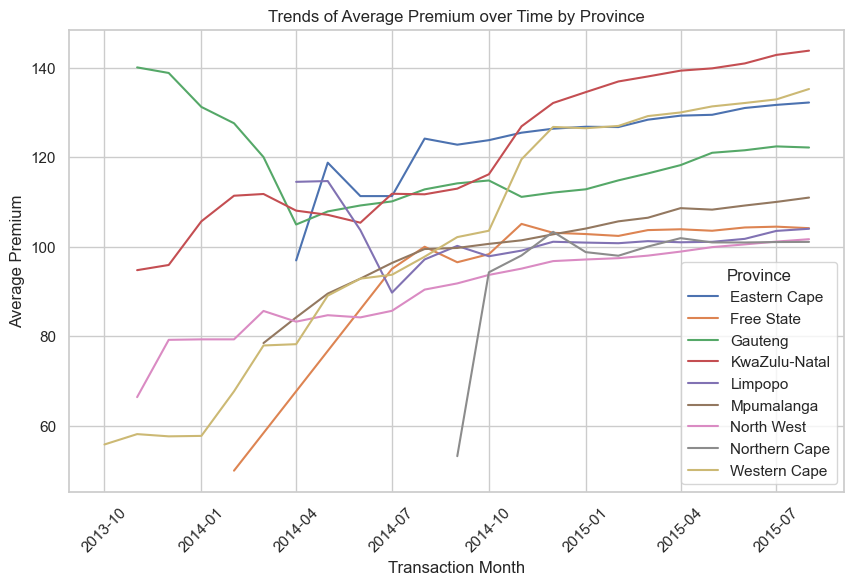

In [91]:
# Plotting trends of average premium over time by province
plt.figure(figsize=(10,6))
sns.lineplot(data=province_grouped, x='TransactionMonth', y='CalculatedPremiumPerTerm', hue='Province')
plt.title('Trends of Average Premium over Time by Province')
plt.xlabel('Transaction Month')
plt.ylabel('Average Premium')
plt.xticks(rotation=45)
plt.show()

In [92]:
# Auto make trends over time
make_grouped = df.groupby(['make', 'TransactionMonth']).agg({
    'make': 'count'
}).rename(columns={'make': 'VehicleCount'}).reset_index()

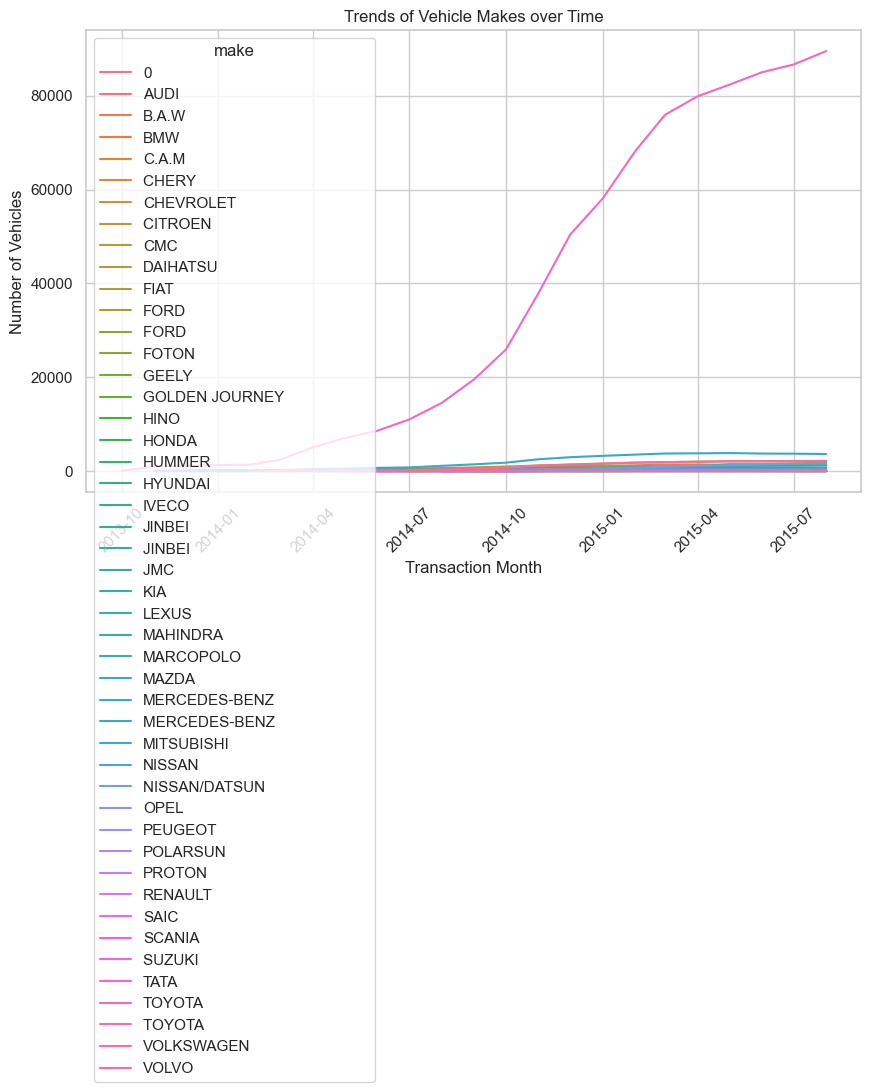

In [93]:
# Plotting vehicle make trends over time
plt.figure(figsize=(10,6))
sns.lineplot(data=make_grouped, x='TransactionMonth', y='VehicleCount', hue='make')
plt.title('Trends of Vehicle Makes over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

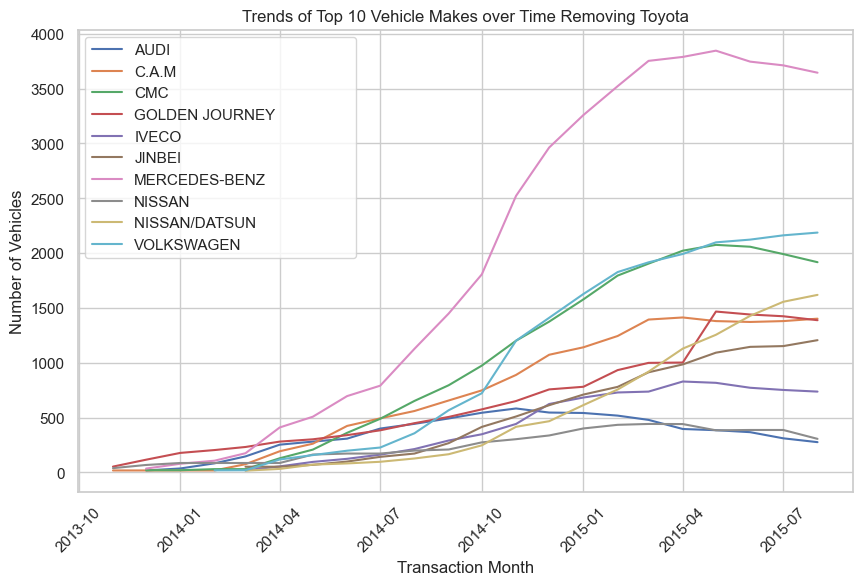

In [94]:
# Filter out Toyota' from the data
make_grouped_filtered = make_grouped[make_grouped['make'] != 'TOYOTA']

# Focus on top 10 most frequent vehicle makes
top_makes = make_grouped_filtered.groupby('make')['VehicleCount'].sum().nlargest(10).index

# Filter the dataset to only include the top 10 makes
make_grouped_top = make_grouped_filtered[make_grouped_filtered['make'].isin(top_makes)]

# Plotting trends of top 10 vehicle makes over time
plt.figure(figsize=(10,6))
sns.lineplot(data=make_grouped_top, x='TransactionMonth', y='VehicleCount', hue='make')
plt.title('Trends of Top 10 Vehicle Makes over Time Removing Toyota')
plt.xlabel('Transaction Month')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

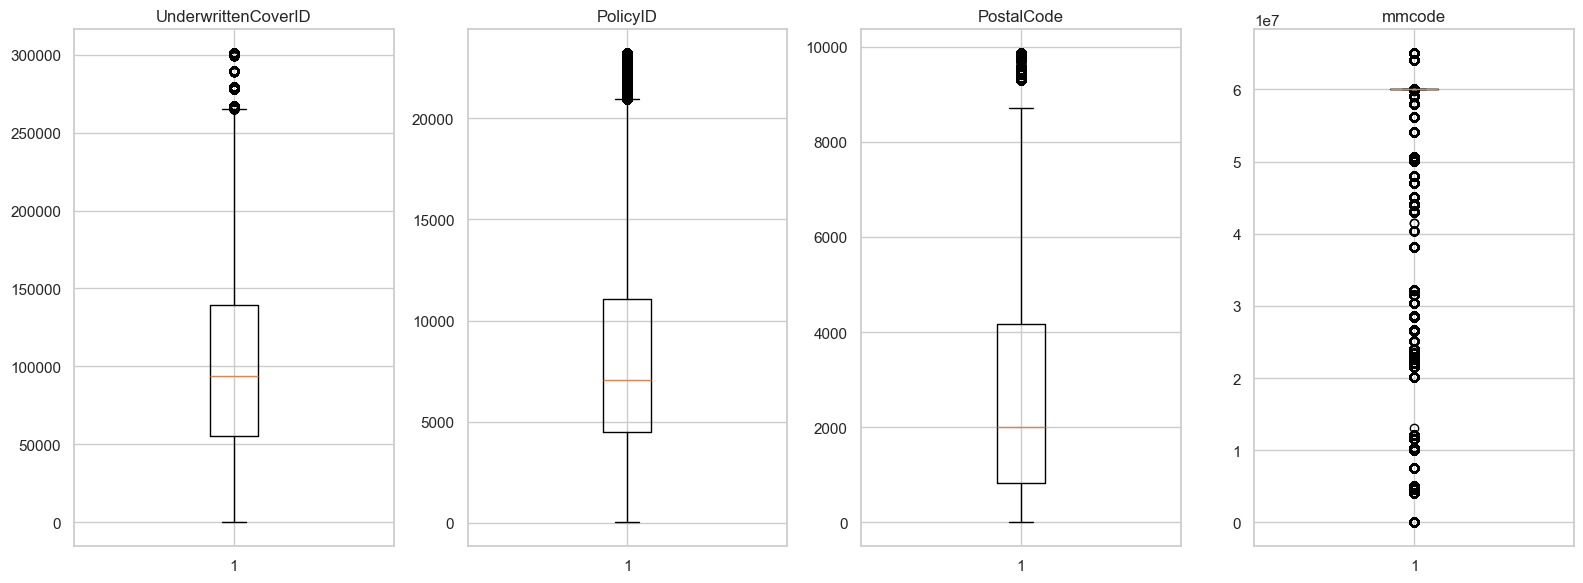

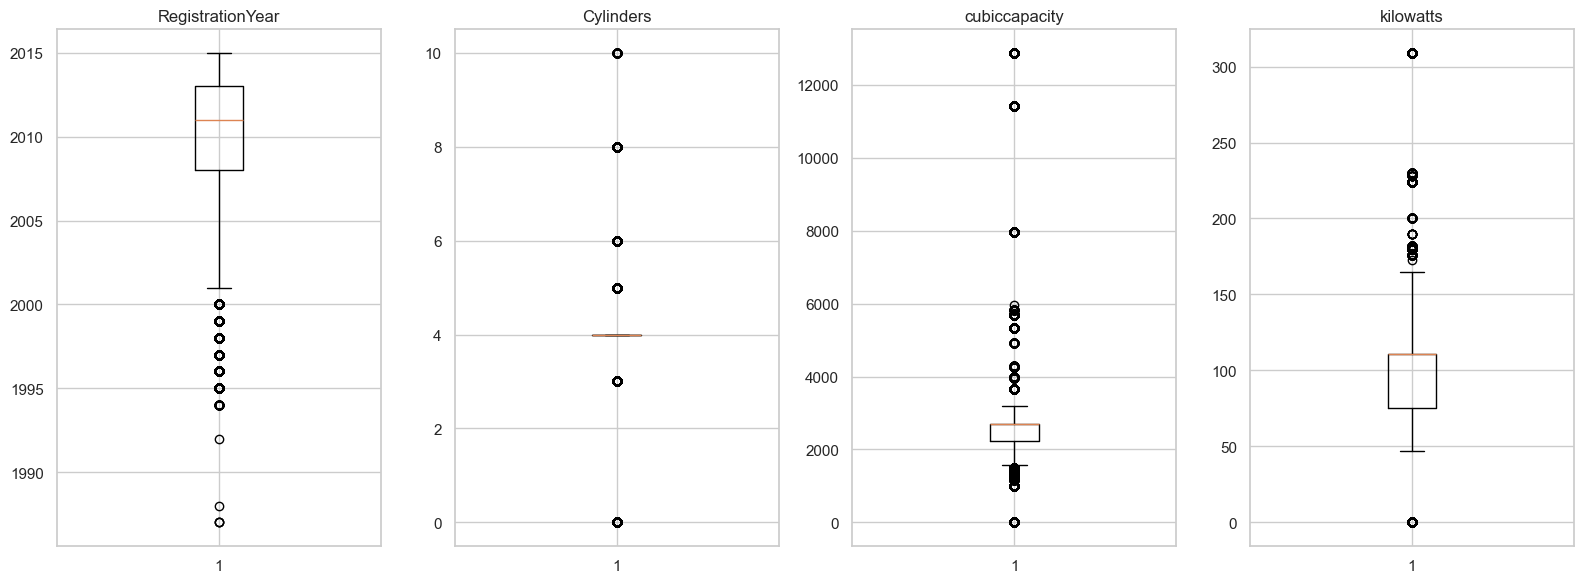

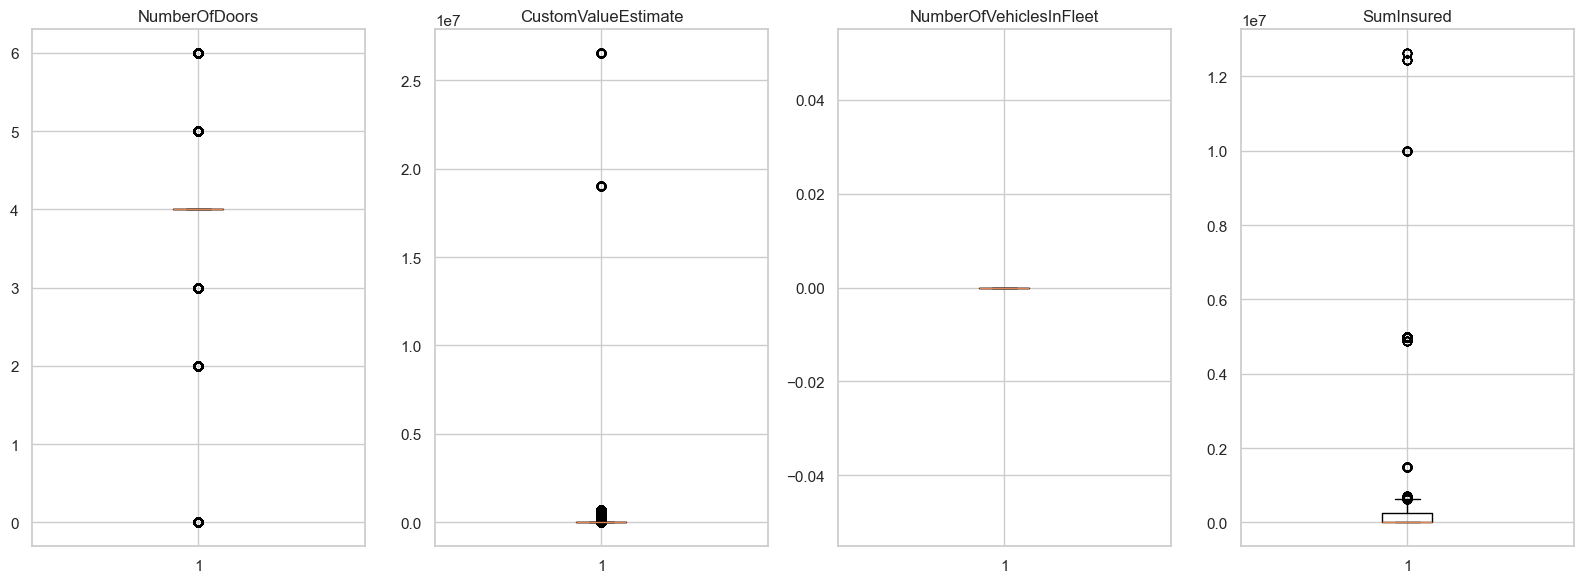

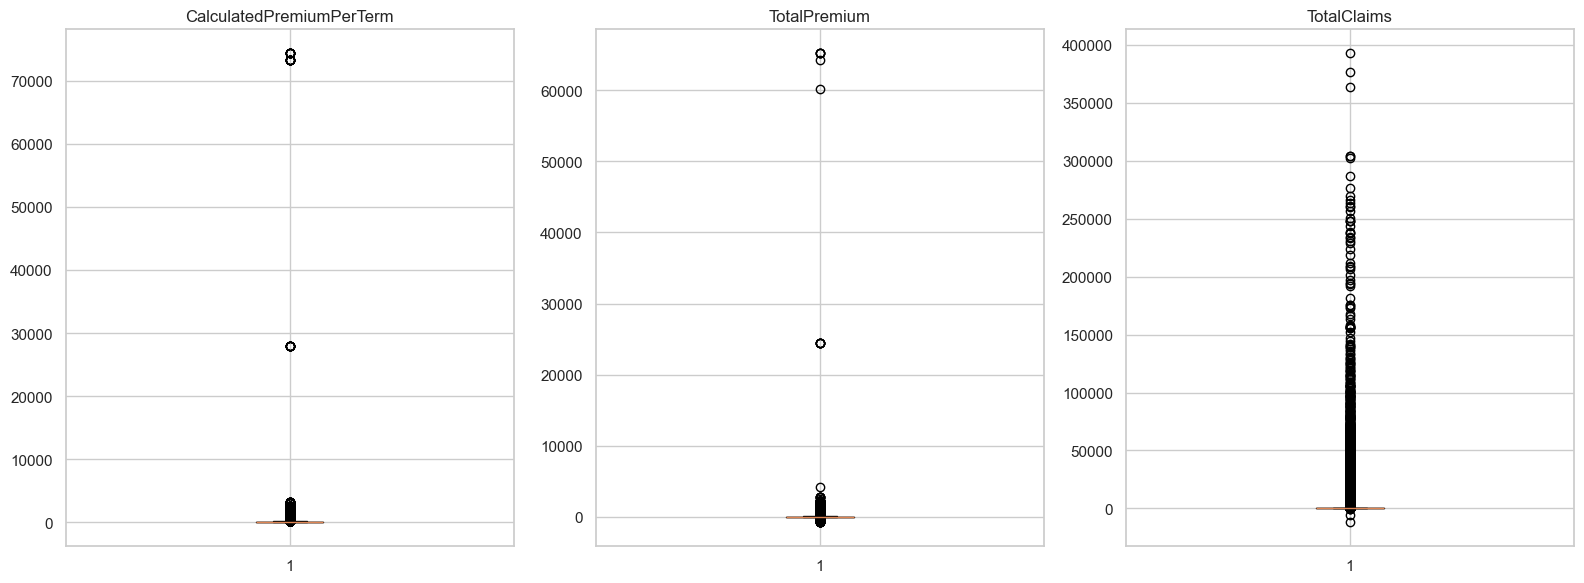

In [95]:
# Number of numerical columns to plot per figure
columns_per_figure = 4

# Create box plots for numerical columns
for i in range(0, len(numerical_columns), columns_per_figure):
    # Select columns for the current figure
    cols_to_plot = numerical_columns[i:i+columns_per_figure]
    
    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(16, 6))
    
    # Ensure axes is an array (needed when plotting less than 4 columns)
    if len(cols_to_plot) == 1:
        axes = [axes]
    
    # Loop through each column and create a boxplot
    for ax, col in zip(axes, cols_to_plot):
        ax.boxplot(df[col].dropna())  # Drop NaN values for the boxplot
        ax.set_title(col)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

### Vehicle and Premium Analysis

This section examines vehicle age distribution and premium statistics using the dataset. Key analyses include:

1. **Data Loading**: The dataset is loaded for analysis.
2. **Vehicle Age Calculation**: The age of each vehicle is calculated based on the `RegistrationYear`.
3. **Visualizations**:
   - **Distribution of Vehicle Age**: A histogram displays the frequency distribution of vehicle ages, complemented by a kernel density estimate (KDE).
   - **Total Premium by Vehicle Type**: A bar plot illustrates the total premium collected for each vehicle type.
   - **Average Premium by Cover Type**: A bar plot shows the average premium per term for each cover type.

These visualizations provide insights into vehicle demographics and premium distribution, aiding in strategic decision-making.


In [96]:
# Set the style for the plots
sns.set_theme(style="whitegrid")

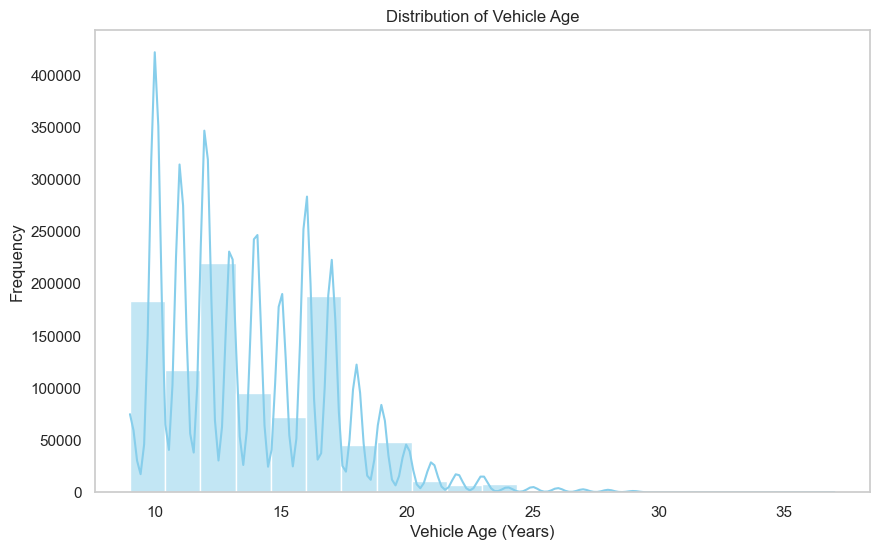

In [97]:
# Plot 1: Distribution of Vehicle Age
df['RegistrationYear'] = pd.to_datetime(df['RegistrationYear'], format='%Y')
df['VehicleAge'] = pd.to_datetime('now').year - df['RegistrationYear'].dt.year

plt.figure(figsize=(10, 6))
sns.histplot(df['VehicleAge'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Vehicle Age')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

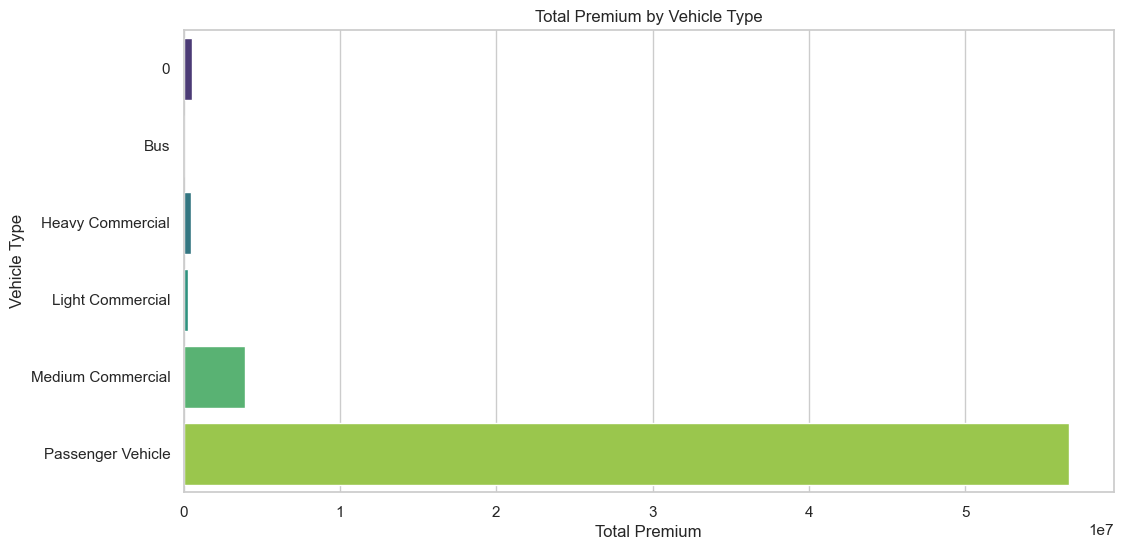

In [98]:
# Plot 2: Total Premium by Vehicle Type
premium_by_vehicle = df.groupby('VehicleType')['TotalPremium'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='TotalPremium', y='VehicleType', data=premium_by_vehicle, palette='viridis', hue='VehicleType', legend=False)
plt.title('Total Premium by Vehicle Type')
plt.xlabel('Total Premium')
plt.ylabel('Vehicle Type')
plt.show()

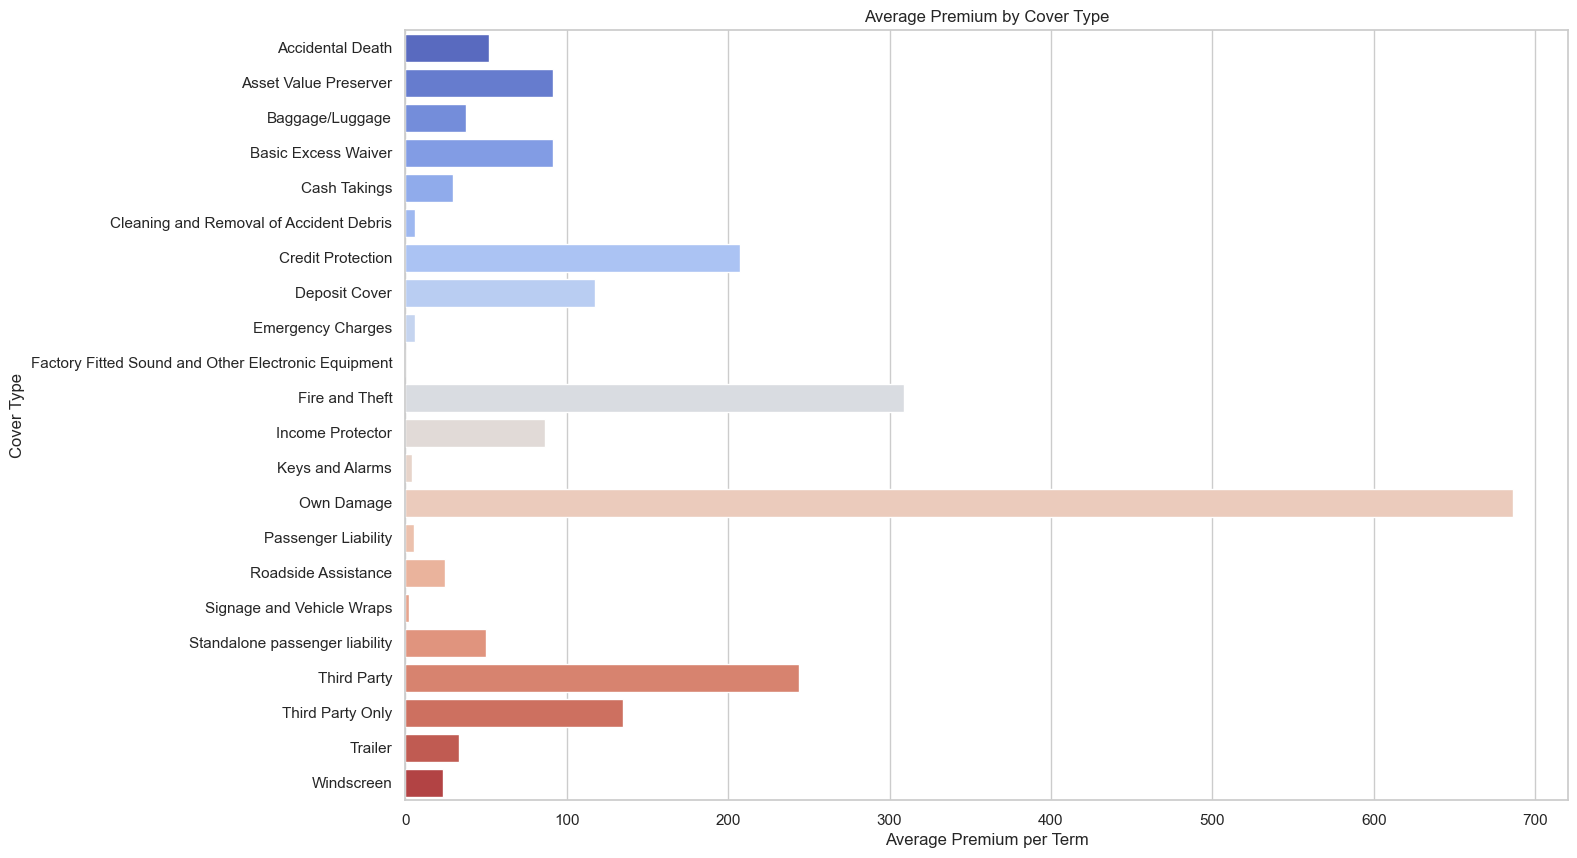

In [99]:
# Plot 3: Average Premium by Cover Type
avg_premium_by_cover = df.groupby('CoverType')['CalculatedPremiumPerTerm'].mean().reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(x='CalculatedPremiumPerTerm', y='CoverType', data=avg_premium_by_cover, palette='coolwarm', hue='CoverType', legend=False)
plt.title('Average Premium by Cover Type')
plt.xlabel('Average Premium per Term')
plt.ylabel('Cover Type')
plt.show()